# Customer review Analysis of Olaplex products


###  Domain Analysis
#### Review-Related Columns:
- PRODUCT_ID: A unique identifier for the product.

- REVIEW_ID: A unique identifier for the review.

- REVIEW_FIRSTPUBLISHTIME: The initial time the review was published.

- REVIEW_LASTMODIFICATIONTIME: The last time the review was modified.

- REVIEW_SUBMISSIONTIME: The time the review was submitted.

- REVIEW_PRODUCTREVIEWSDEEPLINKEDURL: A URL linking to the review on the product page.

- REVIEW_RATING: The numerical rating given by the reviewer (e.g., 1-5 stars).

- REVIEW_RATINGRANGE: The range of the rating scale (e.g., 1-5).

- REVIEW_RATINGSONLY: A flag indicating if only the rating was provided.

- REVIEW_REVIEWTEXT: The textual content of the review where the customer expresses their opinions, experiences, and feelings about the product

- REVIEW_TITLE: It is headline of the review which is shorter and more specific description of the review's main conclusion

#### Product-Related Columns:

- PRODUCT_SKU_CODE: The Stock Keeping Unit (SKU) code of the product.This specific product identifier used for inventory 
  and sales tracking.

- PRODUCT_ACTIVE_INDICATOR: Indicates whether the product is currently active and available for purchase.

- PRODUCT_PRICING_GROUP_NAME: Categorizes the product based on its pricing strategy or tier. This helps in understanding the product's positioning and target market.Here it is Categorized as Pro, Retail and sample.

     - Pro: This likely indicates a premium product. It might have advanced features or be targeted towards specific 
       industries or professionals.
     - Retail: It typically refers to products sold to the general public through retail channels like stores or online
       marketplaces.
     - Sample: This category likely includes sample or trial-sized products, often offered to customers to introduce them to 
       a brand or product line.
  
- PRODUCT_GROUP_NAME: It likely categorizes products based on their purpose or role within the company's product line.Here it is Categorized as Core, Marketing  and seasonal

     - Core: These are essential products that form the backbone of the company's business. They are likely consistently in 
       demand and contribute significantly to the company's revenue.
     - Marketing: These products might be used for marketing or promotional purposes. They could be offered as incentives, 
       giveaways, or limited-edition items to attract customers or promote other products.
     - Seasonal: These products are tied to specific seasons or holidays. They might be relevant only during certain times of
       the year, such as holiday decorations, summer apparel, or winter accessories.
       
- PRODUCT_ROLL_UP_NAME: A higher-level category or group that encompasses multiple product groups. This provides a more granular view of product hierarchies.

- PRODUCT_SAMPLE_INDICATOR: Indicates whether the product is a sample or a full-sized version. This can be useful for understanding product promotions or marketing strategies.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = 'Customer_review.csv' 
data = pd.read_csv(file_path)

In [3]:
data.head()

,PRODUCT_ID,REVIEW_ID,REVIEW_FIRSTPUBLISHTIME,REVIEW_LASTMODIFICATIONTIME,REVIEW_SUBMISSIONTIME,REVIEW_PRODUCTREVIEWSDEEPLINKEDURL,REVIEW_RATING,REVIEW_RATINGRANGE,REVIEW_RATINGSONLY,REVIEW_REVIEWTEXT,REVIEW_TITLE,PRODUCT_SKU_CODE,PRODUCT_ACTIVE_INDICATOR,PRODUCT_PRICING_GROUP_NAME,PRODUCT_GROUP_NAME,PRODUCT_ROLL_UP_NAME,PRODUCT_SAMPLE_INDICATOR
0,172639621,170187084,2020-12-22 12:30:34.000,2020-12-26 09:00:49.258,2020-08-14 13:03:04.000,http://c1.ugc.bazaarvoice.com/10548/172639621/...,5,5,True,NaN,Amazing,NaN,NaN,NaN,NaN,NaN,NaN
1,172639621,170187076,2020-12-22 12:30:34.000,2020-12-22 13:15:28.218,2020-07-30 17:54:32.000,http://c1.ugc.bazaarvoice.com/10548/172639621/...,5,5,True,NaN,Wonderful shampoo,NaN,NaN,NaN,NaN,NaN,NaN
2,172639621,170187078,2020-12-27 07:30:27.000,2020-12-27 07:30:38.678,2020-08-21 10:08:08.000,http://c1.ugc.bazaarvoice.com/10548/172639621/...,5,5,False,Excelente Shampoo deja el cabello súper suave ...,:heart:️:heart:️:heart:️:heart:️,NaN,NaN,NaN,NaN,NaN,NaN
3,172639621,170187086,2020-12-22 12:30:34.000,2020-12-26 09:00:49.258,2020-08-15 08:13:19.000,http://c1.ugc.bazaarvoice.com/10548/172639621/...,5,5,True,NaN,LOVE IT !!!,NaN,NaN,NaN,NaN,NaN,NaN
4,172639621,170187080,2020-12-27 07:30:27.000,2020-12-27 19:04:38.351,2020-07-28 08:44:45.000,http://c1.ugc.bazaarvoice.com/10548/172639621/...,5,5,False,"Lovely, highly concentrated shampoo. It has a ...","Lovely, highly concentrated shampoo. It",NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

(40875, 17)

In [5]:
data.columns

Index(['PRODUCT_ID', 'REVIEW_ID', 'REVIEW_FIRSTPUBLISHTIME',
       'REVIEW_LASTMODIFICATIONTIME', 'REVIEW_SUBMISSIONTIME',
       'REVIEW_PRODUCTREVIEWSDEEPLINKEDURL', 'REVIEW_RATING',
       'REVIEW_RATINGRANGE', 'REVIEW_RATINGSONLY', 'REVIEW_REVIEWTEXT',
       'REVIEW_TITLE', 'PRODUCT_SKU_CODE', 'PRODUCT_ACTIVE_INDICATOR',
       'PRODUCT_PRICING_GROUP_NAME', 'PRODUCT_GROUP_NAME',
       'PRODUCT_ROLL_UP_NAME', 'PRODUCT_SAMPLE_INDICATOR'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40875 entries, 0 to 40874
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   PRODUCT_ID                          40875 non-null  object
 1   REVIEW_ID                           40875 non-null  int64 
 2   REVIEW_FIRSTPUBLISHTIME             40875 non-null  object
 3   REVIEW_LASTMODIFICATIONTIME         40875 non-null  object
 4   REVIEW_SUBMISSIONTIME               40875 non-null  object
 5   REVIEW_PRODUCTREVIEWSDEEPLINKEDURL  40875 non-null  object
 6   REVIEW_RATING                       40875 non-null  int64 
 7   REVIEW_RATINGRANGE                  40875 non-null  int64 
 8   REVIEW_RATINGSONLY                  40875 non-null  bool  
 9   REVIEW_REVIEWTEXT                   27934 non-null  object
 10  REVIEW_TITLE                        40773 non-null  object
 11  PRODUCT_SKU_CODE                    35769 non-null  ob

In [7]:
data.isnull().sum()

PRODUCT_ID                                0
REVIEW_ID                                 0
REVIEW_FIRSTPUBLISHTIME                   0
REVIEW_LASTMODIFICATIONTIME               0
REVIEW_SUBMISSIONTIME                     0
REVIEW_PRODUCTREVIEWSDEEPLINKEDURL        0
REVIEW_RATING                             0
REVIEW_RATINGRANGE                        0
REVIEW_RATINGSONLY                        0
REVIEW_REVIEWTEXT                     12941
REVIEW_TITLE                            102
PRODUCT_SKU_CODE                       5106
PRODUCT_ACTIVE_INDICATOR               5106
PRODUCT_PRICING_GROUP_NAME             5106
PRODUCT_GROUP_NAME                     5333
PRODUCT_ROLL_UP_NAME                   5114
PRODUCT_SAMPLE_INDICATOR               5106
dtype: int64

In [8]:
# finding duplicates
data.duplicated().sum()

0

In [9]:
data.describe()

,REVIEW_ID,REVIEW_RATING,REVIEW_RATINGRANGE
count,4.087500e+04,40875.000000,40875.0
mean,2.185527e+08,4.362593,5.0
std,4.153606e+07,1.270494,0.0
min,1.665348e+08,1.000000,5.0
25%,1.813031e+08,5.000000,5.0
50%,2.091228e+08,5.000000,5.0
75%,2.539367e+08,5.000000,5.0
max,3.256174e+08,5.000000,5.0


#####  Note: Dataset does not contain any continuous data to perform statistical analysis

In [10]:
data.columns

Index(['PRODUCT_ID', 'REVIEW_ID', 'REVIEW_FIRSTPUBLISHTIME',
       'REVIEW_LASTMODIFICATIONTIME', 'REVIEW_SUBMISSIONTIME',
       'REVIEW_PRODUCTREVIEWSDEEPLINKEDURL', 'REVIEW_RATING',
       'REVIEW_RATINGRANGE', 'REVIEW_RATINGSONLY', 'REVIEW_REVIEWTEXT',
       'REVIEW_TITLE', 'PRODUCT_SKU_CODE', 'PRODUCT_ACTIVE_INDICATOR',
       'PRODUCT_PRICING_GROUP_NAME', 'PRODUCT_GROUP_NAME',
       'PRODUCT_ROLL_UP_NAME', 'PRODUCT_SAMPLE_INDICATOR'],
      dtype='object')

In [10]:
# Checking for unique values in each column
data.PRODUCT_ID.value_counts()

PRODUCT_ID
20140603     4730
20140617     3252
20140616     3183
20142954     2937
20142888     2589
             ... 
223224005       2
325221807       2
314990818       2
230106121       2
OXVS0431        2
Name: count, Length: 417, dtype: int64

- Totally 417 different products available in the Olaplex company

In [69]:
data.REVIEW_RATING.value_counts()

REVIEW_RATING
5    30759
1     3616
4     2889
3     2132
2     1479
Name: count, dtype: int64


#### Note:
- More than 30700 products got the review rating as 5
- Number of products rated as 1 are more than the products rated as 4 and 3(need to focus more on these product's quality and feedback for buisiness improvement)
- Few products around 1470 got the rating as 2 

In [36]:
data.REVIEW_RATINGSONLY.value_counts()

REVIEW_RATINGSONLY
False    27935
True     12940
Name: count, dtype: int64

- 31% of the products got only ratings  and 69% products got rating along with feedback in text form 

In [37]:
data.PRODUCT_SKU_CODE.value_counts()

PRODUCT_SKU_CODE
20140603.0    4730
20140617.0    3252
20140616.0    3183
20142954.0    2937
20142888.0    2589
              ... 
20142260.0       2
OXVS0143         2
OXVS0407         2
20140652.0       2
OXVS0431         2
Name: count, Length: 106, dtype: int64

In [42]:
data.PRODUCT_ACTIVE_INDICATOR.value_counts()

PRODUCT_ACTIVE_INDICATOR
True    35769
Name: count, dtype: int64

In [43]:
data.PRODUCT_PRICING_GROUP_NAME.value_counts()

PRODUCT_PRICING_GROUP_NAME
PRO       33742
RETAIL     1800
SAMPLE      227
Name: count, dtype: int64

- Majority of the products are tagged in the pricing group 'Pro', very few products are in 'Retail' and 'sample' groups

In [40]:
data.PRODUCT_GROUP_NAME.value_counts()

PRODUCT_GROUP_NAME
Core         31828
Seasonal      3469
Marketing      245
Name: count, dtype: int64

- Company has more core products as compared to seasonal and Marketing products

In [41]:
data.PRODUCT_ROLL_UP_NAME.value_counts()

PRODUCT_ROLL_UP_NAME
Kits                        8477
No. 3                       4789
No. 5                       3397
No. 4                       3326
No. 6                       3002
No. 7                       2683
No. 0                       2423
No. 8                       1880
No. 9                       1421
No. 4P                      1281
No. 4D                       577
No. 4C                       528
Volumizing Mist              431
Brow Bond                    344
Lash Bond                    279
No. 5L                       254
No. 10                       246
No. 5P                       227
Other                        182
Broad Spectrum Chelating      11
Pro Curl                       3
Name: count, dtype: int64

In [44]:
data.PRODUCT_SAMPLE_INDICATOR.value_counts()

PRODUCT_SAMPLE_INDICATOR
False    35764
True         5
Name: count, dtype: int64

- Only 5 products are selling as sample and  remaining all products are selling in their full version 

In [45]:
data.columns

Index(['PRODUCT_ID', 'REVIEW_ID', 'REVIEW_FIRSTPUBLISHTIME',
       'REVIEW_LASTMODIFICATIONTIME', 'REVIEW_SUBMISSIONTIME',
       'REVIEW_PRODUCTREVIEWSDEEPLINKEDURL', 'REVIEW_RATING',
       'REVIEW_RATINGRANGE', 'REVIEW_RATINGSONLY', 'REVIEW_REVIEWTEXT',
       'REVIEW_TITLE', 'PRODUCT_SKU_CODE', 'PRODUCT_ACTIVE_INDICATOR',
       'PRODUCT_PRICING_GROUP_NAME', 'PRODUCT_GROUP_NAME',
       'PRODUCT_ROLL_UP_NAME', 'PRODUCT_SAMPLE_INDICATOR'],
      dtype='object')

In [ ]:
'REVIEW_ID','REVIEW_FIRSTPUBLISHTIME','REVIEW_LASTMODIFICATIONTIME','REVIEW_SUBMISSIONTIME','REVIEW_PRODUCTREVIEWSDEEPLINKEDURL',
'REVIEW_RATINGRANGE','REVIEW_RATINGSONLY','PRODUCT_SKU_CODE', 'PRODUCT_ACTIVE_INDICATOR','PRODUCT_PRICING_GROUP_NAME',

### Univariate analysis

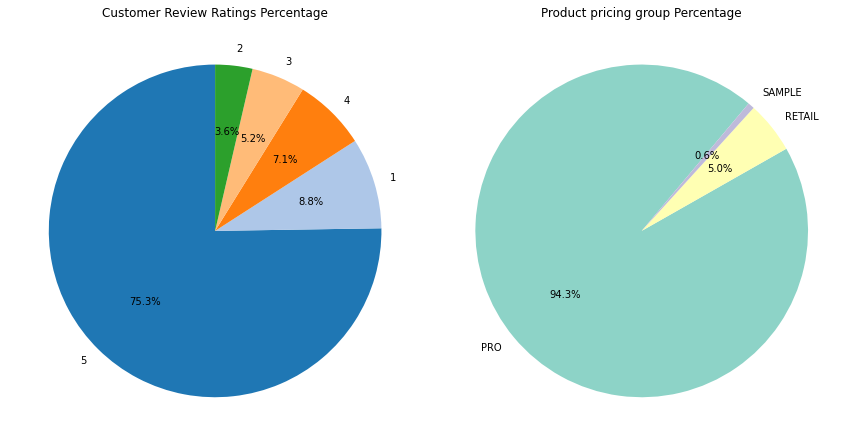

In [64]:
# Count the occurrences for REVIEW_RATING
rating_counts = data['REVIEW_RATING'].value_counts()

# Calculate percentage for REVIEW_RATING
rating_percentages = (rating_counts / rating_counts.sum()) * 100

# Count the occurrences for PRODUCT_CATEGORY
category_counts = data['PRODUCT_PRICING_GROUP_NAME'].value_counts()

# Calculate percentage for PRODUCT_CATEGORY
category_percentages = (category_counts / category_counts.sum()) * 100

# Create a figure for the two pie charts
plt.figure(figsize=(12, 7))

# Plot the pie chart for REVIEW_RATING
plt.subplot(1, 2, 1)  # Subplot 1
plt.pie(rating_percentages, 
        labels=rating_percentages.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=plt.cm.tab20.colors)
plt.title('Customer Review Ratings Percentage')

# Plot the pie chart for PRODUCT_CATEGORY
plt.subplot(1, 2, 2)  # Subplot 2
plt.pie(category_percentages, 
        labels=category_percentages.index, 
        autopct='%1.1f%%', 
        startangle=50, 
        colors=plt.cm.Set3.colors)
plt.title('Product pricing group Percentage')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

- 75.3% of the products got the best rating as 5 and 8.8% of the products got the worst rating as 1
- Olaplex has 94.3% of Premium(Pro) category products , 5% retail products and only 0.6% of trial sized sample products

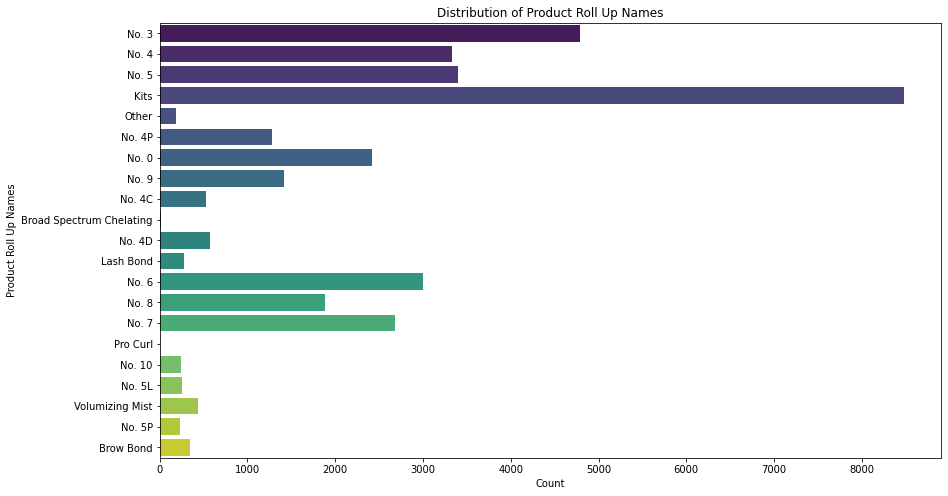

In [74]:
# Create a horizontal count plot
plt.figure(figsize=(14, 8))
sns.countplot(
    y=data.PRODUCT_ROLL_UP_NAME,  # Horizontal bar plot
    palette="viridis"  # Choose a color palette for the bars
)
plt.ylabel('Product Roll Up Names')  # Adjust the label for y-axis
plt.xlabel('Count')  # Adjust the label for x-axis
plt.title('Distribution of Product Roll Up Names')  # Add a title
plt.show()

- Top selling product category is 'Kits' followed by 'No.3' , 'No.4' and 'No.5' categories
- 'Pro curl' and 'Broad Spectrum Chelating'  are the least selling products

In [13]:
# Top 10 selling product categories
data.PRODUCT_ROLL_UP_NAME.value_counts().head(10)

PRODUCT_ROLL_UP_NAME
Kits      8477
No. 3     4789
No. 5     3397
No. 4     3326
No. 6     3002
No. 7     2683
No. 0     2423
No. 8     1880
No. 9     1421
No. 4P    1281
Name: count, dtype: int64

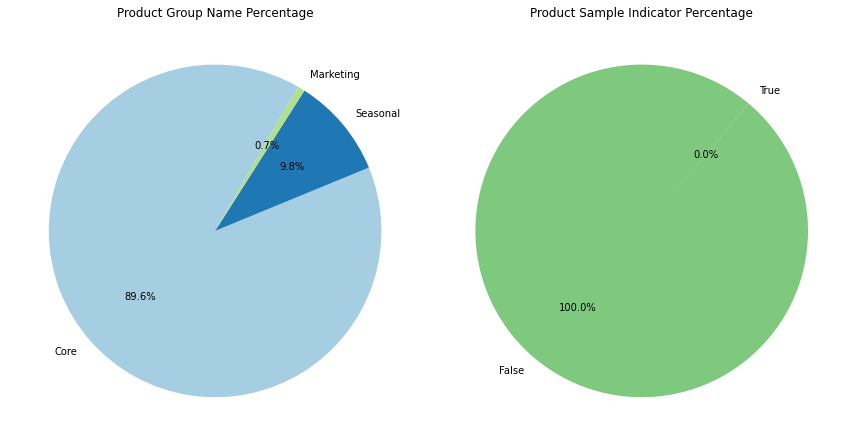

In [80]:
# Count the occurrences for PRODUCT_GROUP_NAME
group_name_counts = data['PRODUCT_GROUP_NAME'].value_counts()

# Calculate percentage for PRODUCT_GROUP_NAME
group_name_percentages = (group_name_counts / group_name_counts.sum()) * 100

# Count the occurrences for PRODUCT_SAMPLE_INDICATOR
sample_indicator_counts = data['PRODUCT_SAMPLE_INDICATOR'].value_counts()

# Calculate percentage for PRODUCT_SAMPLE_INDICATOR
sample_indicator_percentages = (sample_indicator_counts / sample_indicator_counts.sum()) * 100

# Create a figure for the two pie charts
plt.figure(figsize=(12, 7))

# Plot the pie chart for PRODUCT_GROUP_NAME
plt.subplot(1, 2, 1)  # Subplot 1
plt.pie(group_name_percentages, 
        labels=group_name_percentages.index, 
        autopct='%1.1f%%', 
        startangle=60, 
        colors=plt.cm.Paired.colors)  # Distinct color palette
plt.title('Product Group Name Percentage')

# Plot the pie chart for PRODUCT_SAMPLE_INDICATOR
plt.subplot(1, 2, 2)  # Subplot 2
plt.pie(sample_indicator_percentages, 
        labels=sample_indicator_percentages.index, 
        autopct='%1.1f%%', 
        startangle=50, 
        colors=plt.cm.Accent.colors)  # Different color palette
plt.title('Product Sample Indicator Percentage')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


- Olaplex has nearly 90% core products which are in demand and significantly contribute to the revenue 
- 9.8% of the products are offered as per seasonal basis
- Only 0.7% of the products are used for Marketing purpose
- Almost 99.99% of products are selling whole package only less than 0.1% of the products are selling as sample products 

### Bivariate Analysis

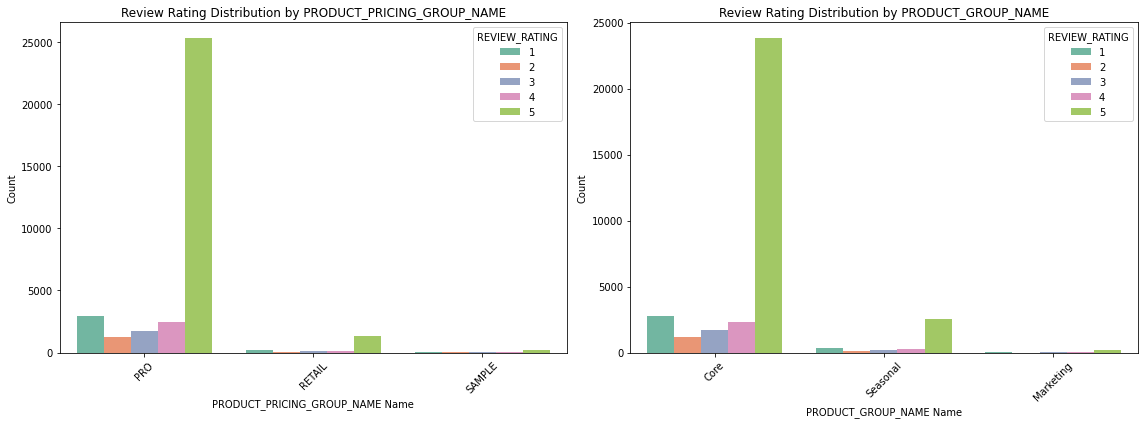

In [92]:
# List of features to compare with REVIEW_RATING
features = ['PRODUCT_PRICING_GROUP_NAME', 'PRODUCT_GROUP_NAME']

# Create subplots for each feature
fig, axes = plt.subplots(1, len(features), figsize=(16, 6))

# Loop through features and plot each one
for ax, feature in zip(axes, features):
    sns.countplot(data=data, x=feature, hue='REVIEW_RATING', palette='Set2', ax=ax)
    ax.set(title=f'Review Rating Distribution by {feature}', xlabel=f'{feature} Name', ylabel='Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()



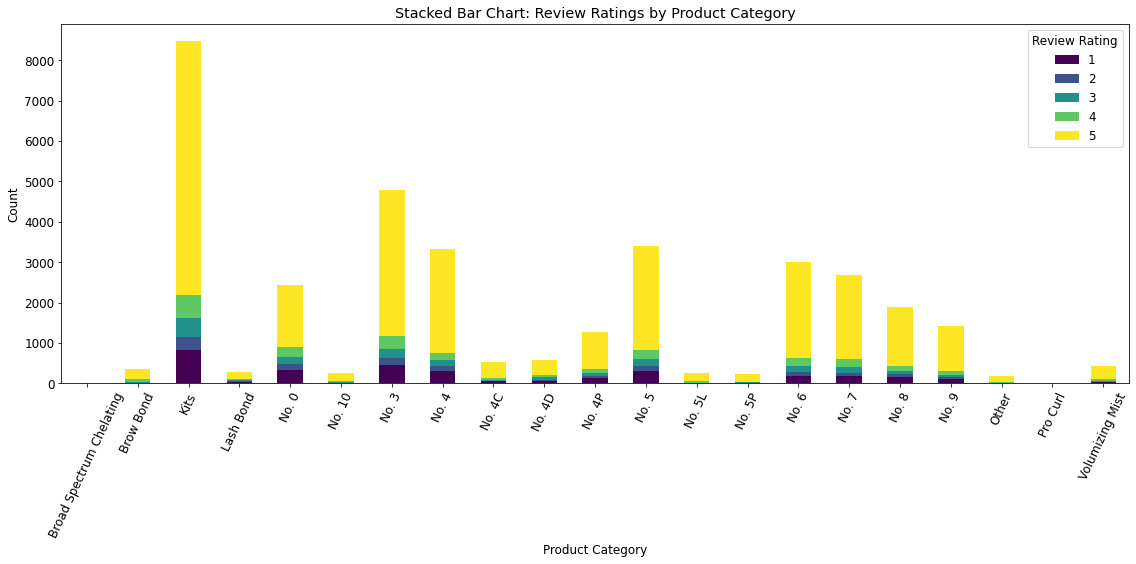

In [110]:
# Create a crosstab to show the count of ratings per product category
rating_category_crosstab = pd.crosstab(data['PRODUCT_ROLL_UP_NAME'], data['REVIEW_RATING'])

# Plot a stacked bar chart
rating_category_crosstab.plot(kind='bar', stacked=True, figsize=(16, 8), colormap='viridis')

plt.title('Stacked Bar Chart: Review Ratings by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=65)
plt.legend(title='Review Rating')
plt.tight_layout()
plt.show()


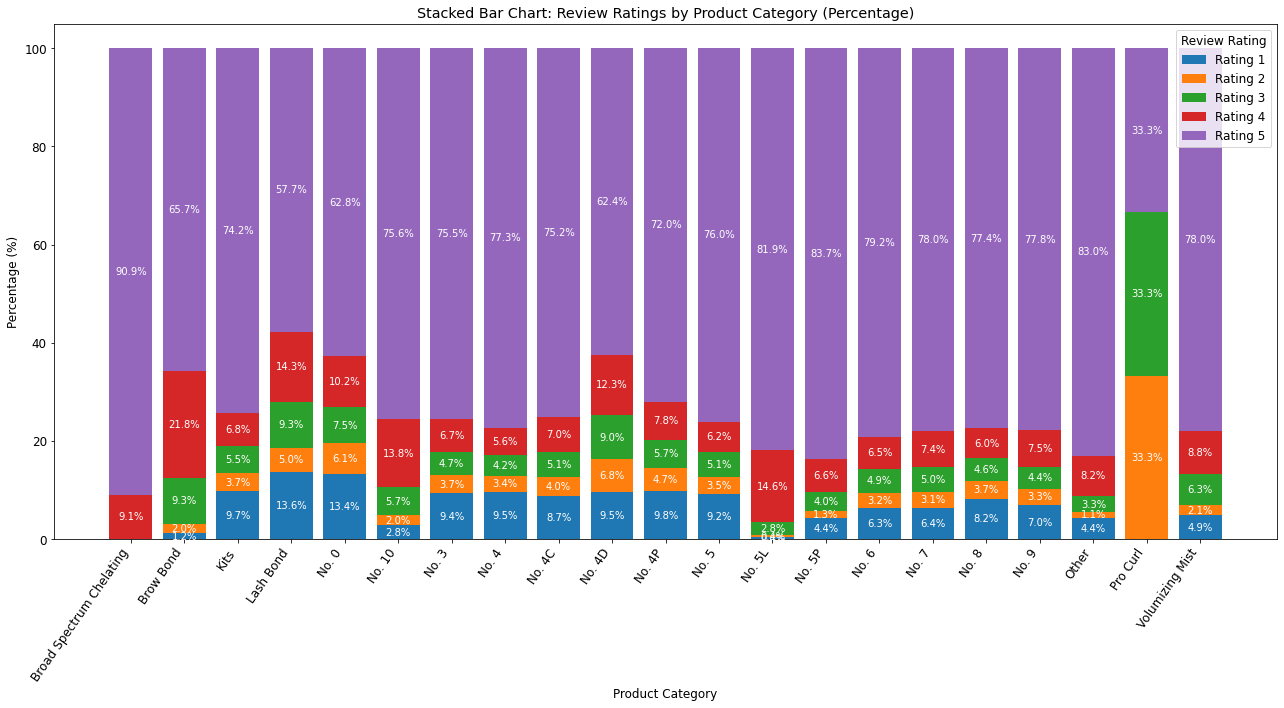

In [115]:
# Create a crosstab to show the count of ratings per product category
rating_category_crosstab = pd.crosstab(data['PRODUCT_ROLL_UP_NAME'], data['REVIEW_RATING'])

# Normalize the crosstab to display percentages
rating_category_percentage = rating_category_crosstab.div(rating_category_crosstab.sum(axis=1), axis=0) * 100

# Create a figure
plt.figure(figsize=(18, 10))

# Plot the stacked bar chart
bottom_values = pd.Series([0] * len(rating_category_percentage), index=rating_category_percentage.index)

for rating in rating_category_percentage.columns:
    plt.bar(rating_category_percentage.index, 
            rating_category_percentage[rating], 
            bottom=bottom_values, 
            label=f'Rating {rating}')
    # Annotate percentages on the bars
    for i, value in enumerate(rating_category_percentage[rating]):
        if value > 0:  # Avoid displaying 0% values
            plt.text(i, bottom_values[i] + value / 2, 
                     f'{value:.1f}%', 
                     ha='center', va='center', fontsize=10, color='white')
    bottom_values += rating_category_percentage[rating]

# Customize the plot
plt.title('Stacked Bar Chart: Review Ratings by Product Category (Percentage)')
plt.xlabel('Product Category')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=55, ha='right')
plt.legend(title='Review Rating')
plt.tight_layout()

# Show the plot
plt.show()


In [6]:
# Convert REVIEW_LASTMODIFICATIONTIME to datetime format
data['REVIEW_LASTMODIFICATIONTIME'] = pd.to_datetime(data['REVIEW_LASTMODIFICATIONTIME'])

# Create the new column 'Review Date' by extracting only the date
data['Review_Date'] = data['REVIEW_LASTMODIFICATIONTIME'].dt.date


In [7]:
data.head()

,PRODUCT_ID,REVIEW_ID,REVIEW_FIRSTPUBLISHTIME,REVIEW_LASTMODIFICATIONTIME,REVIEW_SUBMISSIONTIME,REVIEW_PRODUCTREVIEWSDEEPLINKEDURL,REVIEW_RATING,REVIEW_RATINGRANGE,REVIEW_RATINGSONLY,REVIEW_REVIEWTEXT,REVIEW_TITLE,PRODUCT_SKU_CODE,PRODUCT_ACTIVE_INDICATOR,PRODUCT_PRICING_GROUP_NAME,PRODUCT_GROUP_NAME,PRODUCT_ROLL_UP_NAME,PRODUCT_SAMPLE_INDICATOR,Review_Date
0,172639621,170187084,2020-12-22 12:30:34.000,2020-12-26 09:00:49.258,2020-08-14 13:03:04.000,http://c1.ugc.bazaarvoice.com/10548/172639621/...,5,5,True,NaN,Amazing,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-26
1,172639621,170187076,2020-12-22 12:30:34.000,2020-12-22 13:15:28.218,2020-07-30 17:54:32.000,http://c1.ugc.bazaarvoice.com/10548/172639621/...,5,5,True,NaN,Wonderful shampoo,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-22
2,172639621,170187078,2020-12-27 07:30:27.000,2020-12-27 07:30:38.678,2020-08-21 10:08:08.000,http://c1.ugc.bazaarvoice.com/10548/172639621/...,5,5,False,Excelente Shampoo deja el cabello súper suave ...,:heart:️:heart:️:heart:️:heart:️,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-27
3,172639621,170187086,2020-12-22 12:30:34.000,2020-12-26 09:00:49.258,2020-08-15 08:13:19.000,http://c1.ugc.bazaarvoice.com/10548/172639621/...,5,5,True,NaN,LOVE IT !!!,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-26
4,172639621,170187080,2020-12-27 07:30:27.000,2020-12-27 19:04:38.351,2020-07-28 08:44:45.000,http://c1.ugc.bazaarvoice.com/10548/172639621/...,5,5,False,"Lovely, highly concentrated shampoo. It has a ...","Lovely, highly concentrated shampoo. It",NaN,NaN,NaN,NaN,NaN,NaN,2020-12-27


In [8]:
# Convert 'Review Date' or timestamp column to datetime format (if not already done)
data['Review_Date'] = pd.to_datetime(data['Review_Date'])

# Create 'Reviews in Month' column
data['Reviews_Month'] = data['Review_Date'].dt.month

# Create 'Reviews in Year' column
data['Reviews_Year'] = data['Review_Date'].dt.year



In [9]:
data.head()

,PRODUCT_ID,REVIEW_ID,REVIEW_FIRSTPUBLISHTIME,REVIEW_LASTMODIFICATIONTIME,REVIEW_SUBMISSIONTIME,REVIEW_PRODUCTREVIEWSDEEPLINKEDURL,REVIEW_RATING,REVIEW_RATINGRANGE,REVIEW_RATINGSONLY,REVIEW_REVIEWTEXT,REVIEW_TITLE,PRODUCT_SKU_CODE,PRODUCT_ACTIVE_INDICATOR,PRODUCT_PRICING_GROUP_NAME,PRODUCT_GROUP_NAME,PRODUCT_ROLL_UP_NAME,PRODUCT_SAMPLE_INDICATOR,Review_Date,Reviews_Month,Reviews_Year
0,172639621,170187084,2020-12-22 12:30:34.000,2020-12-26 09:00:49.258,2020-08-14 13:03:04.000,http://c1.ugc.bazaarvoice.com/10548/172639621/...,5,5,True,NaN,Amazing,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-26,12,2020
1,172639621,170187076,2020-12-22 12:30:34.000,2020-12-22 13:15:28.218,2020-07-30 17:54:32.000,http://c1.ugc.bazaarvoice.com/10548/172639621/...,5,5,True,NaN,Wonderful shampoo,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-22,12,2020
2,172639621,170187078,2020-12-27 07:30:27.000,2020-12-27 07:30:38.678,2020-08-21 10:08:08.000,http://c1.ugc.bazaarvoice.com/10548/172639621/...,5,5,False,Excelente Shampoo deja el cabello súper suave ...,:heart:️:heart:️:heart:️:heart:️,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-27,12,2020
3,172639621,170187086,2020-12-22 12:30:34.000,2020-12-26 09:00:49.258,2020-08-15 08:13:19.000,http://c1.ugc.bazaarvoice.com/10548/172639621/...,5,5,True,NaN,LOVE IT !!!,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-26,12,2020
4,172639621,170187080,2020-12-27 07:30:27.000,2020-12-27 19:04:38.351,2020-07-28 08:44:45.000,http://c1.ugc.bazaarvoice.com/10548/172639621/...,5,5,False,"Lovely, highly concentrated shampoo. It has a ...","Lovely, highly concentrated shampoo. It",NaN,NaN,NaN,NaN,NaN,NaN,2020-12-27,12,2020


In [10]:
#Displaying number of reviews per month
data.Reviews_Month.value_counts()

Reviews_Month
12    8203
5     5262
8     3443
1     3403
6     3206
7     3140
10    2924
9     2727
11    2420
3     2189
2     1985
4     1973
Name: count, dtype: int64

In [11]:
data.Reviews_Year.value_counts()

Reviews_Year
2023    10730
2021     9718
2024     7690
2022     7591
2020     5146
Name: count, dtype: int64

In [12]:
#  plotting donut chart with % of reviews by month and year
import calendar

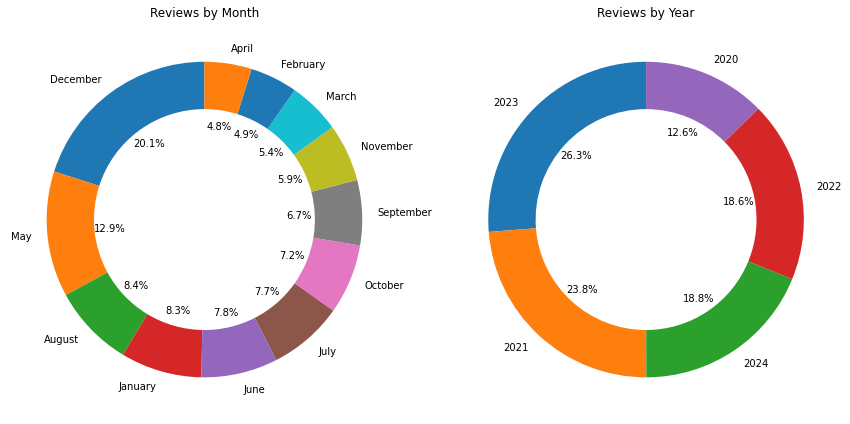

In [77]:
# Function to plot donut chart
def plot_donut(data, column, ax, title, labels=None):
    counts = data[column].value_counts().sort_values(ascending=False)  # Sort in descending order
    percentages = counts / counts.sum() * 100
    labels = labels or counts.index
    wedges, texts, autotexts = ax.pie(
        percentages, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.3}
    )
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontsize(10)
    ax.set_title(title)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Donut plot for Reviews_Month
month_counts = data['Reviews_Month'].value_counts().sort_values(ascending=False)
month_labels = [calendar.month_name[month] for month in month_counts.index]
plot_donut(data, 'Reviews_Month', axes[0], 'Reviews by Month', labels=month_labels)

# Donut plot for Reviews_Year
plot_donut(data, 'Reviews_Year', axes[1], 'Reviews by Year')

# Display the plots
plt.tight_layout()
plt.show()

### Insights 

### Displaying top Review Ratings by Month and Year (Descending Order)

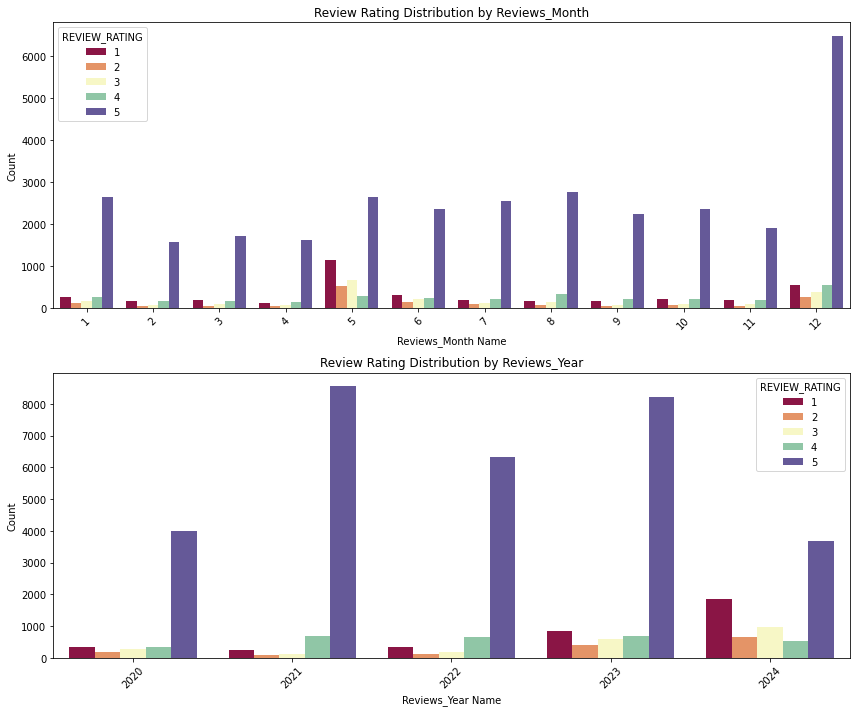

In [80]:
# Define the features to analyze
features = ['Reviews_Month', 'Reviews_Year']  # Replace with your actual column names

# Create subplots
fig, axes = plt.subplots(len(features), 1, figsize=(12, 10))  # Vertical layout for subplots

# Loop through features and plot each one
for ax, feature in zip(axes, features):
    grouped_data = (
        data.groupby([feature, 'REVIEW_RATING']).size().reset_index(name='Count')
    )
    sns.barplot(
        data=grouped_data, 
        x=feature, 
        y='Count', 
        hue='REVIEW_RATING', 
        palette='Spectral', 
        ax=ax
    )
    ax.set_title(f'Review Rating Distribution by {feature}')
    ax.set_xlabel(f'{feature} Name')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

# Adjust layout for better readability
plt.tight_layout()
plt.show()


##  Displaying proportion of Review Ratings by Year

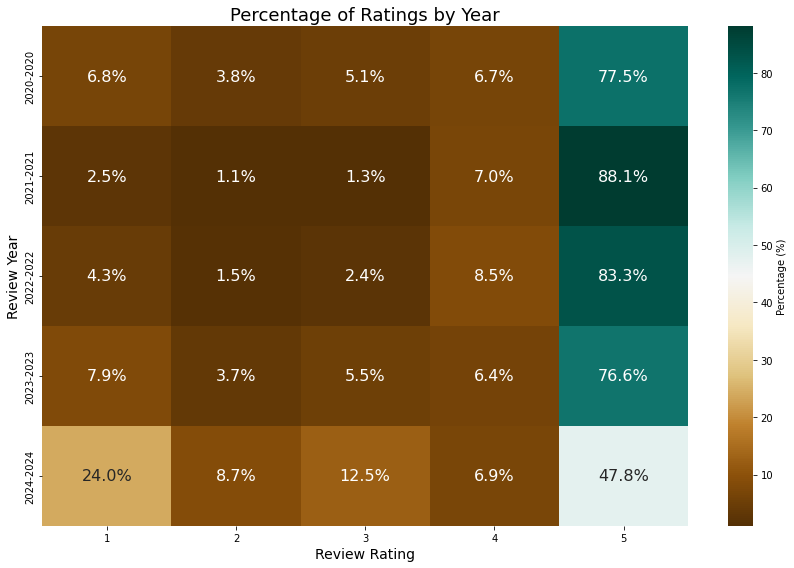

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pivot data to calculate percentages
pivot_table = (
    data.groupby(['Reviews_Year', 'REVIEW_RATING'])
    .size()
    .groupby(level=0)
    .apply(lambda x: 100 * x / x.sum())  # Convert counts to percentages
    .unstack()  # Create a matrix for the heatmap
    .fillna(0)  # Fill missing values with 0
)

# Plot the heatmap with a different colormap
plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_table, 
    annot=pivot_table.applymap(lambda x: f'{x:.1f}%'),  # Add % symbol to annotations
    fmt='',  # Avoid formatting conflicts
    cmap='BrBG',  # Change colormap here
    cbar_kws={'label': 'Percentage (%)'},
    annot_kws={"size": 16}  # Increase the font size inside the heatmap
)

# Add labels and title with larger font size
plt.title('Percentage of Ratings by Year', fontsize=18)
plt.xlabel('Review Rating', fontsize=14)
plt.ylabel('Review Year', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()



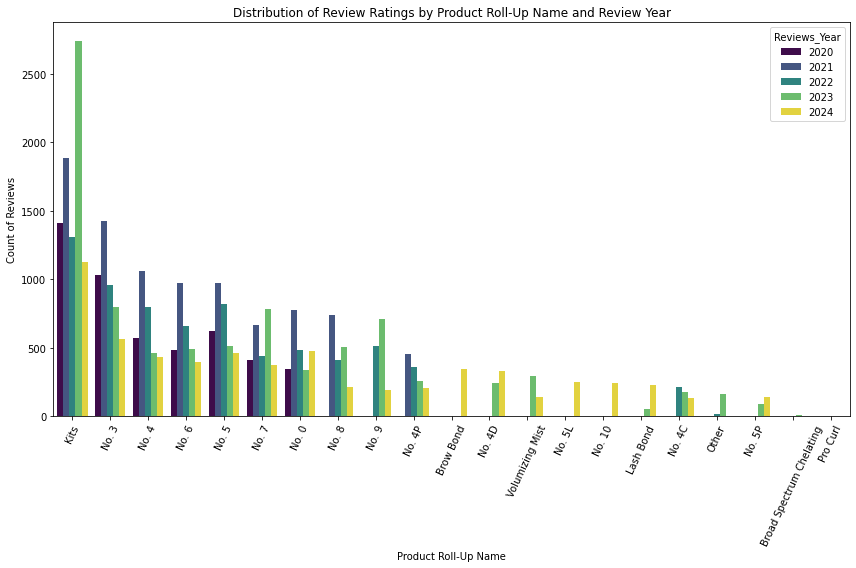

In [114]:
# Group data by 'PRODUCT_ROLL_UP_NAME' and 'Review_Year' and compute the count
grouped_data = (
    data.groupby(['PRODUCT_ROLL_UP_NAME', 'Reviews_Year'])
    .size()
    .reset_index(name='Count')
    .sort_values(by=['Count'], ascending=False)  # Sort by Count in descending order
)

# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(data=grouped_data, x='PRODUCT_ROLL_UP_NAME', y='Count', hue='Reviews_Year', palette='viridis')

# Set plot title and labels
plt.title('Distribution of Review Ratings by Product Roll-Up Name and Review Year')
plt.xlabel('Product Roll-Up Name')
plt.ylabel('Count of Reviews')
plt.xticks(rotation=65)

# Display the plot
plt.tight_layout()
plt.show()


### Handling Missing values

In [13]:
data.isnull().sum()

PRODUCT_ID                                0
REVIEW_ID                                 0
REVIEW_FIRSTPUBLISHTIME                   0
REVIEW_LASTMODIFICATIONTIME               0
REVIEW_SUBMISSIONTIME                     0
REVIEW_PRODUCTREVIEWSDEEPLINKEDURL        0
REVIEW_RATING                             0
REVIEW_RATINGRANGE                        0
REVIEW_RATINGSONLY                        0
REVIEW_REVIEWTEXT                     12941
REVIEW_TITLE                            102
PRODUCT_SKU_CODE                       5106
PRODUCT_ACTIVE_INDICATOR               5106
PRODUCT_PRICING_GROUP_NAME             5106
PRODUCT_GROUP_NAME                     5333
PRODUCT_ROLL_UP_NAME                   5114
PRODUCT_SAMPLE_INDICATOR               5106
Review_Date                               0
Reviews_Month                             0
Reviews_Year                              0
dtype: int64

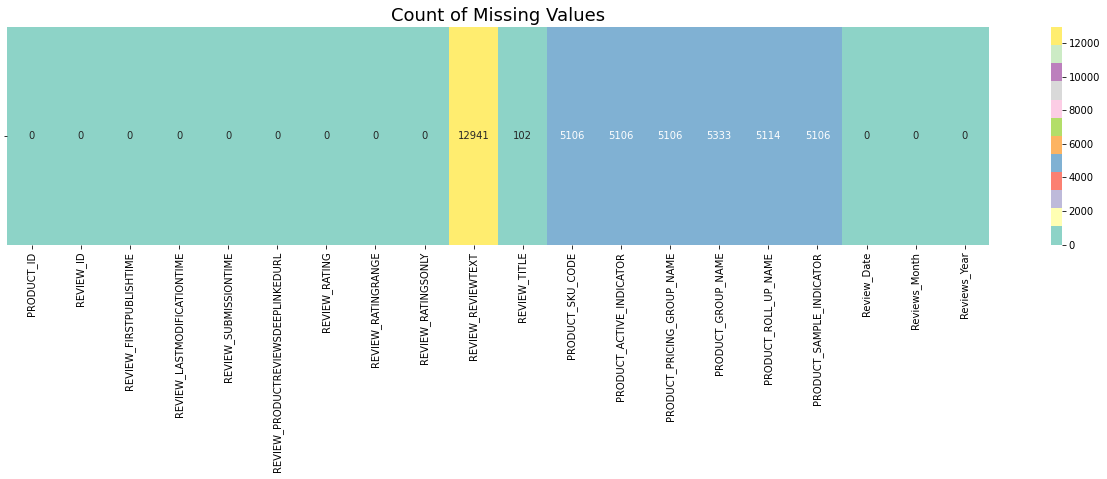

In [14]:
# display missing values in heatmap
plt.figure(figsize=(22,4))
sns.heatmap((data.isna().sum()).to_frame(name='').T,cmap='Set3', annot=True,
             fmt='0.0f').set_title('Count of Missing Values', fontsize=18)
plt.show()

Note:  REVIEW_REVIEWTEXT column has more missing values but review Title column has only 102 missing values.As we review Title is derived from the information given in review text. Hence we can use review title information for further analysis.(It is an idea but we didn't apply it in further analysis)

In [15]:
# Fill missing values in REVIEW_REVIEWTEXT with values from REVIEW_TITLE
data['REVIEW_REVIEWTEXT'] = data['REVIEW_REVIEWTEXT'].fillna(data['REVIEW_TITLE'])


In [16]:
data.isnull().sum()

PRODUCT_ID                               0
REVIEW_ID                                0
REVIEW_FIRSTPUBLISHTIME                  0
REVIEW_LASTMODIFICATIONTIME              0
REVIEW_SUBMISSIONTIME                    0
REVIEW_PRODUCTREVIEWSDEEPLINKEDURL       0
REVIEW_RATING                            0
REVIEW_RATINGRANGE                       0
REVIEW_RATINGSONLY                       0
REVIEW_REVIEWTEXT                       47
REVIEW_TITLE                           102
PRODUCT_SKU_CODE                      5106
PRODUCT_ACTIVE_INDICATOR              5106
PRODUCT_PRICING_GROUP_NAME            5106
PRODUCT_GROUP_NAME                    5333
PRODUCT_ROLL_UP_NAME                  5114
PRODUCT_SAMPLE_INDICATOR              5106
Review_Date                              0
Reviews_Month                            0
Reviews_Year                             0
dtype: int64

- After replacing  missing values using review title , still 47 missing values  are remaining . we can drop these rows. We can fill these missing values by replacing  'No review provided'
- For sentiment analysis based on the ratings we can define positive , negative or moderate in the sentiment column in upcoming stage

In [ ]:
REVIEW_RATING,  REVIEW_RATINGSONLY, PRODUCT_PRICING_GROUP_NAME,PRODUCT_GROUP_NAME,
PRODUCT_ROLL_UP_NAME, PRODUCT_SAMPLE_INDICATOR

In [17]:
# Fill missing values in the 'REVIEW_REVIEWTEXT' column with a placeholder
data['REVIEW_REVIEWTEXT'] = data['REVIEW_REVIEWTEXT'].fillna('No review provided')


In [18]:
# Check the missing values after filling
print(data['REVIEW_REVIEWTEXT'].isnull().sum())  # Should show 0 missing values

0


In [19]:
data.head()

,PRODUCT_ID,REVIEW_ID,REVIEW_FIRSTPUBLISHTIME,REVIEW_LASTMODIFICATIONTIME,REVIEW_SUBMISSIONTIME,REVIEW_PRODUCTREVIEWSDEEPLINKEDURL,REVIEW_RATING,REVIEW_RATINGRANGE,REVIEW_RATINGSONLY,REVIEW_REVIEWTEXT,REVIEW_TITLE,PRODUCT_SKU_CODE,PRODUCT_ACTIVE_INDICATOR,PRODUCT_PRICING_GROUP_NAME,PRODUCT_GROUP_NAME,PRODUCT_ROLL_UP_NAME,PRODUCT_SAMPLE_INDICATOR,Review_Date,Reviews_Month,Reviews_Year
0,172639621,170187084,2020-12-22 12:30:34.000,2020-12-26 09:00:49.258,2020-08-14 13:03:04.000,http://c1.ugc.bazaarvoice.com/10548/172639621/...,5,5,True,Amazing,Amazing,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-26,12,2020
1,172639621,170187076,2020-12-22 12:30:34.000,2020-12-22 13:15:28.218,2020-07-30 17:54:32.000,http://c1.ugc.bazaarvoice.com/10548/172639621/...,5,5,True,Wonderful shampoo,Wonderful shampoo,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-22,12,2020
2,172639621,170187078,2020-12-27 07:30:27.000,2020-12-27 07:30:38.678,2020-08-21 10:08:08.000,http://c1.ugc.bazaarvoice.com/10548/172639621/...,5,5,False,Excelente Shampoo deja el cabello súper suave ...,:heart:️:heart:️:heart:️:heart:️,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-27,12,2020
3,172639621,170187086,2020-12-22 12:30:34.000,2020-12-26 09:00:49.258,2020-08-15 08:13:19.000,http://c1.ugc.bazaarvoice.com/10548/172639621/...,5,5,True,LOVE IT !!!,LOVE IT !!!,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-26,12,2020
4,172639621,170187080,2020-12-27 07:30:27.000,2020-12-27 19:04:38.351,2020-07-28 08:44:45.000,http://c1.ugc.bazaarvoice.com/10548/172639621/...,5,5,False,"Lovely, highly concentrated shampoo. It has a ...","Lovely, highly concentrated shampoo. It",NaN,NaN,NaN,NaN,NaN,NaN,2020-12-27,12,2020


In [123]:
data.PRODUCT_ACTIVE_INDICATOR.value_counts()

PRODUCT_ACTIVE_INDICATOR
True    35769
Name: count, dtype: int64

In [124]:
data.PRODUCT_SAMPLE_INDICATOR.value_counts()

PRODUCT_SAMPLE_INDICATOR
False    35764
True         5
Name: count, dtype: int64

### Note

- We found that many features are irrelevant for the sentiment analysis. Hence we can drop those columns to simply the data frame. 
- The fetures like REVIEW_ID ,REVIEW_FIRSTPUBLISHTIME,REVIEW_SUBMISSIONTIME,REVIEW_RATINGRANGE,REVIEW_RATINGSONLY, REVIEW_TITLE, PRODUCT_SKU_CODE, REVIEW_PRODUCTREVIEWSDEEPLINKEDURL,PRODUCT_ACTIVE_INDICATOR, PRODUCT_SAMPLE_INDICATOR, PRODUCT_ACTIVE_INDICATOR can be dropped 
-- remove PRODUCT_SAMPLE_INDICATOR


In [20]:
# Dropping irrelevant features 
# List of columns to drop
columns_to_drop = ['REVIEW_ID','REVIEW_FIRSTPUBLISHTIME','REVIEW_SUBMISSIONTIME','REVIEW_RATINGRANGE',
                   'REVIEW_RATINGSONLY','REVIEW_TITLE','REVIEW_PRODUCTREVIEWSDEEPLINKEDURL','PRODUCT_SKU_CODE',
                   'PRODUCT_ACTIVE_INDICATOR','PRODUCT_SAMPLE_INDICATOR']

# Drop the specified columns and save the result in a new DataFrame 'df'
df = data.drop(columns=columns_to_drop)


In [21]:
# Display the new DataFrame
print(df)

      PRODUCT_ID REVIEW_LASTMODIFICATIONTIME  REVIEW_RATING  \
0      172639621     2020-12-26 09:00:49.258              5   
1      172639621     2020-12-22 13:15:28.218              5   
2      172639621     2020-12-27 07:30:38.678              5   
3      172639621     2020-12-26 09:00:49.258              5   
4      172639621     2020-12-27 19:04:38.351              5   
...          ...                         ...            ...   
40870   OXVS0430     2024-10-26 18:42:44.040              5   
40871   OXVS0430     2024-09-13 12:05:31.614              5   
40872   OXVS0430     2024-08-30 20:15:54.483              5   
40873   OXVS0431     2024-11-11 11:07:39.443              3   
40874   OXVS0431     2024-11-11 10:53:23.499              1   

                                       REVIEW_REVIEWTEXT  \
0                                                Amazing   
1                                      Wonderful shampoo   
2      Excelente Shampoo deja el cabello súper suave ...   
3  

In [22]:
# Saving the cleaned data to a CSV file named 'Cleaned_data.csv'  for future use
# without including the index column
df.to_csv('Cleaned_data.csv', index=False) 

In [23]:
df.head()

,PRODUCT_ID,REVIEW_LASTMODIFICATIONTIME,REVIEW_RATING,REVIEW_REVIEWTEXT,PRODUCT_PRICING_GROUP_NAME,PRODUCT_GROUP_NAME,PRODUCT_ROLL_UP_NAME,Review_Date,Reviews_Month,Reviews_Year
0,172639621,2020-12-26 09:00:49.258,5,Amazing,NaN,NaN,NaN,2020-12-26,12,2020
1,172639621,2020-12-22 13:15:28.218,5,Wonderful shampoo,NaN,NaN,NaN,2020-12-22,12,2020
2,172639621,2020-12-27 07:30:38.678,5,Excelente Shampoo deja el cabello súper suave ...,NaN,NaN,NaN,2020-12-27,12,2020
3,172639621,2020-12-26 09:00:49.258,5,LOVE IT !!!,NaN,NaN,NaN,2020-12-26,12,2020
4,172639621,2020-12-27 19:04:38.351,5,"Lovely, highly concentrated shampoo. It has a ...",NaN,NaN,NaN,2020-12-27,12,2020


In [24]:
df.shape

(40875, 10)

In [25]:
df.columns

Index(['PRODUCT_ID', 'REVIEW_LASTMODIFICATIONTIME', 'REVIEW_RATING',
       'REVIEW_REVIEWTEXT', 'PRODUCT_PRICING_GROUP_NAME', 'PRODUCT_GROUP_NAME',
       'PRODUCT_ROLL_UP_NAME', 'Review_Date', 'Reviews_Month', 'Reviews_Year'],
      dtype='object')

 Doubts
- PRODUCT_PRICING_GROUP_NAME in this column mode will be 'Pro' , need to confirm to replace this with missing values
- PRODUCT_GROUP_NAME  in this column mode will be 'Core' , need to confirm to replace this with missing values
- PRODUCT_ROLL_UP_NAME  and PRODUCT_SAMPLE_INDICATOR   for replacing missing values need to discuss

In [2]:
df=pd.read_csv('Cleaned_data.csv')
df.head()

,PRODUCT_ID,REVIEW_LASTMODIFICATIONTIME,REVIEW_RATING,REVIEW_REVIEWTEXT,PRODUCT_PRICING_GROUP_NAME,PRODUCT_GROUP_NAME,PRODUCT_ROLL_UP_NAME,Review_Date,Reviews_Month,Reviews_Year
0,172639621,2020-12-26 09:00:49.258,5,Amazing,NaN,NaN,NaN,2020-12-26,12,2020
1,172639621,2020-12-22 13:15:28.218,5,Wonderful shampoo,NaN,NaN,NaN,2020-12-22,12,2020
2,172639621,2020-12-27 07:30:38.678,5,Excelente Shampoo deja el cabello súper suave ...,NaN,NaN,NaN,2020-12-27,12,2020
3,172639621,2020-12-26 09:00:49.258,5,LOVE IT !!!,NaN,NaN,NaN,2020-12-26,12,2020
4,172639621,2020-12-27 19:04:38.351,5,"Lovely, highly concentrated shampoo. It has a ...",NaN,NaN,NaN,2020-12-27,12,2020


In [3]:
df.shape

(40875, 10)

In [4]:
df.isnull().sum()

PRODUCT_ID                        0
REVIEW_LASTMODIFICATIONTIME       0
REVIEW_RATING                     0
REVIEW_REVIEWTEXT                 0
PRODUCT_PRICING_GROUP_NAME     5106
PRODUCT_GROUP_NAME             5333
PRODUCT_ROLL_UP_NAME           5114
Review_Date                       0
Reviews_Month                     0
Reviews_Year                      0
dtype: int64

### Text preprocessing

In [5]:
#1  Convert reviews  to lower case
df['REVIEW_REVIEWTEXT'] = df['REVIEW_REVIEWTEXT'].str.lower()
df['REVIEW_REVIEWTEXT'].head()

0                                              amazing
1                                    wonderful shampoo
2    excelente shampoo deja el cabello súper suave ...
3                                          love it !!!
4    lovely, highly concentrated shampoo. it has a ...
Name: REVIEW_REVIEWTEXT, dtype: object

In [6]:
#2 Converting emojies into text 
import emoji

# Convert emojis in the 'review text' column to text
df['REVIEW_REVIEWTEXT'] = df['REVIEW_REVIEWTEXT'].apply(lambda x: emoji.demojize(x))

In [7]:
df['REVIEW_REVIEWTEXT'].iloc[150:155]

150                                       great product!
151    :thumbs_up::thumbs_up::thumbs_up::thumbs_up::t...
152    because i color my hair, it is difficult for m...
153    after using this conditioner paired with the n...
154    between buying at ulta and buying online, i've...
Name: REVIEW_REVIEWTEXT, dtype: object

### The below code detected languages wrongly hence not used for language detection and translation

In [10]:
from langdetect import detect
import langid
import pandas as pd

# Function to detect language using langdetect and fallback to langid
def detect_language(text):
    try:
        # Primary detection using langdetect
        lang = detect(text)
    except Exception:
        # Fallback to langid if langdetect fails
        lang, _ = langid.classify(text)
    return lang



# Apply the enhanced detection function
df['Language'] = df['REVIEW_REVIEWTEXT'].apply(detect_language)

# Display the results
print(df)



      PRODUCT_ID REVIEW_LASTMODIFICATIONTIME  REVIEW_RATING  \
0      172639621     2020-12-26 09:00:49.258              5   
1      172639621     2020-12-22 13:15:28.218              5   
2      172639621     2020-12-27 07:30:38.678              5   
3      172639621     2020-12-26 09:00:49.258              5   
4      172639621     2020-12-27 19:04:38.351              5   
...          ...                         ...            ...   
40870   OXVS0430     2024-10-26 18:42:44.040              5   
40871   OXVS0430     2024-09-13 12:05:31.614              5   
40872   OXVS0430     2024-08-30 20:15:54.483              5   
40873   OXVS0431     2024-11-11 11:07:39.443              3   
40874   OXVS0431     2024-11-11 10:53:23.499              1   

                                       REVIEW_REVIEWTEXT  \
0                                                amazing   
1                                      wonderful shampoo   
2      excelente shampoo deja el cabello súper suave ...   
3  

## Language translation is done in google colab and the new translated dataframe is saved in CSV file . Lets read the file 

In [22]:
Trans_df = pd.read_csv("merged_data.csv")

Trans_df

,PRODUCT_ID,REVIEW_LASTMODIFICATIONTIME,REVIEW_RATING,REVIEW_REVIEWTEXT,PRODUCT_PRICING_GROUP_NAME,PRODUCT_GROUP_NAME,PRODUCT_ROLL_UP_NAME,Review_Date,Reviews_Month,Reviews_Year,Language,Translated_Review
0,172639621,2020-12-26 09:00:49.258,5,amazing,NaN,NaN,NaN,2020-12-26,12,2020,en,amazing
1,172639621,2020-12-22 13:15:28.218,5,wonderful shampoo,NaN,NaN,NaN,2020-12-22,12,2020,en,wonderful shampoo
2,172639621,2020-12-27 07:30:38.678,5,excelente shampoo deja el cabello súper suave ...,NaN,NaN,NaN,2020-12-27,12,2020,es,excellent shampoo leaves the super soft hair a...
3,172639621,2020-12-26 09:00:49.258,5,love it !!!,NaN,NaN,NaN,2020-12-26,12,2020,en,love it !!!
4,172639621,2020-12-27 19:04:38.351,5,"lovely, highly concentrated shampoo. it has a ...",NaN,NaN,NaN,2020-12-27,12,2020,en,"lovely, highly concentrated shampoo. it has a ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
40870,OXVS0430,2024-10-26 18:42:44.040,5,the olaplex discovery kit offers a fantastic i...,PRO,Seasonal,Kits,2024-10-26,10,2024,en,the olaplex discovery kit offers a fantastic i...
40871,OXVS0430,2024-09-13 12:05:31.614,5,"i’ve never tried olaplex products before, and ...",PRO,Seasonal,Kits,2024-09-13,9,2024,en,"i’ve never tried olaplex products before, and ..."
40872,OXVS0430,2024-08-30 20:15:54.483,5,this kit is amazing! if you’ve been wanting to...,PRO,Seasonal,Kits,2024-08-30,8,2024,en,this kit is amazing! if you’ve been wanting to...
40873,OXVS0431,2024-11-11 11:07:39.443,3,i bought this product the other day as a prese...,PRO,Seasonal,Kits,2024-11-11,11,2024,en,i bought this product the other day as a prese...


In [23]:
Trans_df.head()

,PRODUCT_ID,REVIEW_LASTMODIFICATIONTIME,REVIEW_RATING,REVIEW_REVIEWTEXT,PRODUCT_PRICING_GROUP_NAME,PRODUCT_GROUP_NAME,PRODUCT_ROLL_UP_NAME,Review_Date,Reviews_Month,Reviews_Year,Language,Translated_Review
0,172639621,2020-12-26 09:00:49.258,5,amazing,NaN,NaN,NaN,2020-12-26,12,2020,en,amazing
1,172639621,2020-12-22 13:15:28.218,5,wonderful shampoo,NaN,NaN,NaN,2020-12-22,12,2020,en,wonderful shampoo
2,172639621,2020-12-27 07:30:38.678,5,excelente shampoo deja el cabello súper suave ...,NaN,NaN,NaN,2020-12-27,12,2020,es,excellent shampoo leaves the super soft hair a...
3,172639621,2020-12-26 09:00:49.258,5,love it !!!,NaN,NaN,NaN,2020-12-26,12,2020,en,love it !!!
4,172639621,2020-12-27 19:04:38.351,5,"lovely, highly concentrated shampoo. it has a ...",NaN,NaN,NaN,2020-12-27,12,2020,en,"lovely, highly concentrated shampoo. it has a ..."


In [25]:
Trans_df.isnull().sum()

PRODUCT_ID                        0
REVIEW_LASTMODIFICATIONTIME       0
REVIEW_RATING                     0
REVIEW_REVIEWTEXT                 4
PRODUCT_PRICING_GROUP_NAME     5106
PRODUCT_GROUP_NAME             5333
PRODUCT_ROLL_UP_NAME           5114
Review_Date                       0
Reviews_Month                     0
Reviews_Year                      0
Language                          0
Translated_Review                 4
dtype: int64

In [26]:
Trans_df.Language.value_counts()

Language
en     37089
es      1476
it       911
fr       762
cs       102
tr        83
ru        67
de        66
th        47
pt        42
ca        27
pl        23
nl        21
la        19
ml        12
fi        12
da        11
hu         8
nds        8
no         8
ms         7
sk         7
ko         6
fy         6
ceb        5
eo         4
sv         3
hy         3
ro         3
et         3
ja         3
id         3
jbo        2
zh         2
wa         2
lt         2
gl         2
he         2
ar         2
be         2
kk         1
war        1
el         1
hi         1
eu         1
hr         1
af         1
tl         1
my         1
ie         1
ia         1
ast        1
Name: count, dtype: int64

In [27]:
Trans_df.Language.nunique()

52

In [30]:
Trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40875 entries, 0 to 40874
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   PRODUCT_ID                   40875 non-null  object
 1   REVIEW_LASTMODIFICATIONTIME  40875 non-null  object
 2   REVIEW_RATING                40875 non-null  int64 
 3   REVIEW_REVIEWTEXT            40871 non-null  object
 4   PRODUCT_PRICING_GROUP_NAME   35769 non-null  object
 5   PRODUCT_GROUP_NAME           35542 non-null  object
 6   PRODUCT_ROLL_UP_NAME         35761 non-null  object
 7   Review_Date                  40875 non-null  object
 8   Reviews_Month                40875 non-null  int64 
 9   Reviews_Year                 40875 non-null  int64 
 10  Language                     40875 non-null  object
 11  Translated_Review            40871 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.7+ MB


In [31]:
# Removing URLs,emails , contact numbers and extra spaces in the reviews
import pandas as pd
import re

# Define a cleaning function with a type check
def clean_review(text):
    if not isinstance(text, str):
        return text  # If it's not a string, return it as is
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
    # Remove emails
    text = re.sub(r"\S+@\S+\.\S+", "", text)
    # Remove phone numbers (supports formats like 123-456-7890, (123) 456-7890, etc.)
    text = re.sub(r"\b\d{10}\b|(\d{3})[-.\s]?\d{3}[-.\s]?\d{4}", "", text)
    # Remove extra spaces
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Apply the cleaning function to the Translated_Review column
Trans_df['Cleaned_Translated_Review'] = Trans_df['Translated_Review'].apply(clean_review)

# Display the cleaned reviews
print(Trans_df[['Translated_Review', 'Cleaned_Translated_Review']])


                                       Translated_Review  \
0                                                amazing   
1                                      wonderful shampoo   
2      excellent shampoo leaves the super soft hair a...   
3                                            love it !!!   
4      lovely, highly concentrated shampoo. it has a ...   
...                                                  ...   
40870  the olaplex discovery kit offers a fantastic i...   
40871  i’ve never tried olaplex products before, and ...   
40872  this kit is amazing! if you’ve been wanting to...   
40873  i bought this product the other day as a prese...   
40874  arrived today,advertised  in gift box arrived ...   

                               Cleaned_Translated_Review  
0                                                amazing  
1                                      wonderful shampoo  
2      excellent shampoo leaves the super soft hair a...  
3                                          

In [37]:
Trans_df.columns

Index(['PRODUCT_ID', 'REVIEW_LASTMODIFICATIONTIME', 'REVIEW_RATING',
       'REVIEW_REVIEWTEXT', 'PRODUCT_PRICING_GROUP_NAME', 'PRODUCT_GROUP_NAME',
       'PRODUCT_ROLL_UP_NAME', 'Review_Date', 'Reviews_Month', 'Reviews_Year',
       'Language', 'Translated_Review', 'Cleaned_Translated_Review'],
      dtype='object')

In [38]:
import re

# Remove special characters from the 'Cleaned_Translated_Review' column
Trans_df['Cleaned_Translated_Review'] = Trans_df['Cleaned_Translated_Review'].str.replace(r'[^\w\s]', '', regex=True)

# Display the DataFrame to verify changes
print(Trans_df[['Cleaned_Translated_Review']])


                               Cleaned_Translated_Review
0                                                amazing
1                                      wonderful shampoo
2      excellent shampoo leaves the super soft hair a...
3                                               love it 
4      lovely highly concentrated shampoo it has a ri...
...                                                  ...
40870  the olaplex discovery kit offers a fantastic i...
40871  ive never tried olaplex products before and th...
40872  this kit is amazing if youve been wanting to t...
40873  i bought this product the other day as a prese...
40874  arrived todayadvertised in gift box arrived lo...

[40875 rows x 1 columns]


In [41]:
# Removing Non alphabetic characters and expanding contractions
import re
import contractions

def clean_text(text):
    if isinstance(text, str):
        # Expand contractions
        text = contractions.fix(text)
        # Remove non-alphabetic characters (keeping only letters and spaces)
        text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

# Apply the cleaning function to the column
Trans_df['Cleaned_Translated_Review'] = Trans_df['Cleaned_Translated_Review'].apply(clean_text)


<bound method NDFrame.head of                                Cleaned_Translated_Review
0                                                amazing
1                                      wonderful shampoo
2      excellent shampoo leaves the super soft hair a...
3                                               love it 
4      lovely highly concentrated shampoo it has a ri...
...                                                  ...
40870  the olaplex discovery kit offers a fantastic i...
40871  i have never tried olaplex products before and...
40872  this kit is amazing if you have been wanting t...
40873  i bought this product the other day as a prese...
40874  arrived todayadvertised in gift box arrived lo...

[40875 rows x 1 columns]>


In [46]:
Trans_df[['Cleaned_Translated_Review']].head(10)

,Cleaned_Translated_Review
0,amazing
1,wonderful shampoo
2,excellent shampoo leaves the super soft hair a...
3,love it
4,lovely highly concentrated shampoo it has a ri...
5,love it glad you do not
6,makes the hair healthy from the first shampoo ...
7,i open my salon on january of and since then t...
8,very concentrated so very little goes along w...
9,using olaplex on the backbar is so ecconomical...


In [48]:
# Tokanization
import pandas as pd
from nltk.tokenize import word_tokenize
import nltk

# Download necessary NLTK resources
nltk.download('punkt')

# Function to tokenize the review
def tokenize_review(review):
    if isinstance(review, str):  # Ensure the review is a string
        tokens = word_tokenize(review)
        return tokens  # Return the list of tokens
    else:
        return []  # Return an empty list for non-string reviews

# Assuming Trans_df is your DataFrame
# Apply the tokenization function and create a new column
Trans_df['Tokenized_Review'] = Trans_df['Cleaned_Translated_Review'].apply(tokenize_review)

# Display the DataFrame with the new column
print(Trans_df[['Cleaned_Translated_Review', 'Tokenized_Review']])


[nltk_data] Downloading package punkt to C:\Users\Asharani
[nltk_data]     Neelakanth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                               Cleaned_Translated_Review  \
0                                                amazing   
1                                      wonderful shampoo   
2      excellent shampoo leaves the super soft hair a...   
3                                               love it    
4      lovely highly concentrated shampoo it has a ri...   
...                                                  ...   
40870  the olaplex discovery kit offers a fantastic i...   
40871  i have never tried olaplex products before and...   
40872  this kit is amazing if you have been wanting t...   
40873  i bought this product the other day as a prese...   
40874  arrived todayadvertised in gift box arrived lo...   

                                        Tokenized_Review  
0                                              [amazing]  
1                                   [wonderful, shampoo]  
2      [excellent, shampoo, leaves, the, super, soft,...  
3                                          

In [36]:
#5 Removing stop words
from nltk.corpus import stopwords

# Download stopwords if not already done
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Remove stopwords from the 'tokenized review' column
df['Cleaned review'] = df['Tokenized_review'].apply(
    lambda tokens: [word for word in tokens if word.lower() not in stop_words]
)


[nltk_data] Downloading package stopwords to C:\Users\Asharani
[nltk_data]     Neelakanth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
df['Cleaned review'].head()

0                                            [amazing]
1                                 [wonderful, shampoo]
2    [excelente, shampoo, deja, el, cabello, súper,...
3                                               [love]
4    [lovely, highly, concentrated, shampoo, rich, ...
Name: Cleaned review, dtype: object

In [38]:
#6 Lemmatization or Stemming
from nltk.stem import WordNetLemmatizer

# Download WordNet resources if not already done
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()

# Apply lemmatization
df['lemmatized_review'] = df['Cleaned review'].apply(
    lambda tokens: [lemmatizer.lemmatize(word) for word in tokens]
)


[nltk_data] Downloading package wordnet to C:\Users\Asharani
[nltk_data]     Neelakanth\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Asharani
[nltk_data]     Neelakanth\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [39]:
df['lemmatized_review'].head()

0                                            [amazing]
1                                 [wonderful, shampoo]
2    [excelente, shampoo, deja, el, cabello, súper,...
3                                               [love]
4    [lovely, highly, concentrated, shampoo, rich, ...
Name: lemmatized_review, dtype: object

In [43]:
# Handle missing values and ensure all entries are strings
df['lemmatized_review'] = df['lemmatized_review'].apply(
    lambda x: ' '.join(x) if isinstance(x, list) else str(x)
)

# Count the words in each review
df['word_count'] = df['lemmatized_review'].apply(lambda review: len(review.split()))

# Display the DataFrame with word counts
print(df[['lemmatized_review', 'word_count']])


                                       lemmatized_review  word_count
0                                                amazing           1
1                                      wonderful shampoo           2
2      excelente shampoo deja el cabello súper suave ...          18
3                                                   love           1
4      lovely highly concentrated shampoo rich moistu...          18
...                                                  ...         ...
40870  olaplex discovery kit offer fantastic introduc...          64
40871  ive never tried olaplex product discovery kit ...         107
40872  kit amazing youve wanting try olaplex dont kno...          81
40873  bought product day present item delivered come...           9
40874  arrived todayadvertised gift box arrived loose...          19

[40875 rows x 2 columns]


In [61]:
# Combine all text from the 'lemmatized_review' column
text = ' '.join(df['lemmatized_review'].dropna().apply(
    lambda x: ' '.join(x) if isinstance(x, list) else str(x)
))
all_words= text.split()
all_words

['amazing',
 'wonderful',
 'shampoo',
 'excelente',
 'shampoo',
 'deja',
 'el',
 'cabello',
 'súper',
 'suave',
 'solo',
 'neceistas',
 'un',
 'poco',
 'del',
 'producto',
 'para',
 'sentir',
 'el',
 'cabello',
 'limpio',
 'love',
 'lovely',
 'highly',
 'concentrated',
 'shampoo',
 'rich',
 'moisturizing',
 'lather',
 'also',
 'rinse',
 'clear',
 'prepping',
 'hair',
 '5',
 'conditioner',
 'whatever',
 'treatment',
 'needed',
 'love',
 'love',
 'glad',
 'u',
 'dont',
 'make',
 'hair',
 'healthy',
 'first',
 'shampoo',
 'add',
 'amazing',
 'shine',
 'open',
 'salon',
 'january',
 '2019and',
 'since',
 'second',
 'back',
 'bar',
 'bottle',
 'olaplex',
 'use',
 'shampoo',
 'client',
 'love',
 'concentrated',
 'little',
 'go',
 'along',
 'way',
 'school',
 'salon',
 'barbershop',
 '2',
 'using',
 'olaplex',
 'backbar',
 'ecconomical',
 'small',
 'amount',
 'emulsified',
 'wet',
 'hand',
 'give',
 'much',
 'lather',
 'work',
 'well',
 'hair',
 'type',
 'great',
 'way',
 'promote',
 'retail'

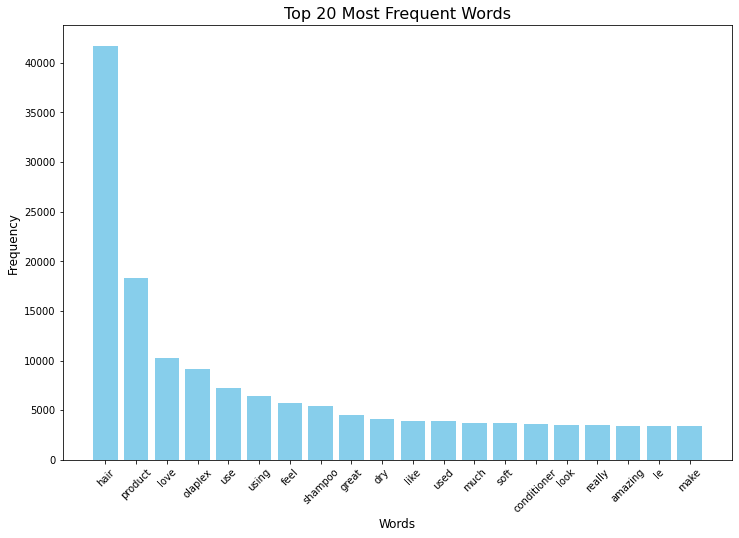

In [62]:
# Count word frequencies
word_counts = Counter(all_words)

# Get the most common words
most_common = word_counts.most_common(20)  # Top 20 most frequent words

# Convert to DataFrame for plotting
freq_df = pd.DataFrame(most_common, columns=['Word', 'Frequency'])

# Plot a bar chart
plt.figure(figsize=(12, 8))
plt.bar(freq_df['Word'], freq_df['Frequency'], color='skyblue')
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top 20 Most Frequent Words', fontsize=16)
plt.xticks(rotation=45)
plt.show()

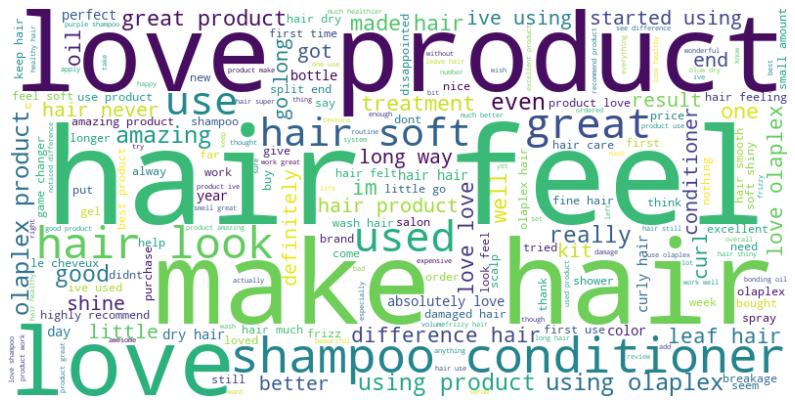

In [63]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text from the 'lemmatized_review' column
text = ' '.join(df['lemmatized_review'].dropna().apply(
    lambda x: ' '.join(x) if isinstance(x, list) else str(x)
))

# Generate the word cloud
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    colormap='viridis', 
    max_words=200
).generate(text)

# Display the word cloud
plt.figure(figsize=(14, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## visulaization

In [ ]:
# Below is the LLM code

In [56]:
!pip install langchain_community

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
googletrans 4.0.0rc1 requires httpx==0.13.3, but you have httpx 0.28.1 which is incompatible.
jupyter-server 1.13.5 requires pywinpty<2; os_name == "nt", but you have pywinpty 2.0.2 which is incompatible.



   ---------------------------------------- 2.5/2.5 MB 3.5 MB/s eta 0:00:00
   ---------------------------------------- 1.0/1.0 MB 3.7 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 8.0.1
    Uninstalling tenacity-8.0.1:
      Successfully uninstalled tenacity-8.0.1
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
  Attempting uninstall: h11
    Found existing installation: h11 0.9.0
    Uninstalling h11-0.9.0:
      Successfully uninstalled h11-0.9.0
  Attempting uninstall: yarl
    Found existing installation: yarl 1.6.3
    Uninstalling yarl-1.6.3:
      Successfully uninstalled yarl-1.6.3
  Attempting uninstall: httpcore
    Found existing installation: httpcore 0.9.1
    Uninstalling httpcore-0.9.1:
      Successfully uninstalled httpcore-0.9.1
  Attempting uninstall: httpx
    Found existing installation: httpx 0.13.3
    Un

In [1]:
from langchain_community.llms import Ollama
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

# Initialize Ollama LLM
llm = Ollama(model="llama3.2")

# Reviews
reviews = """
1. Makes your hair feel like silk preventing it from breakages when brushing. If you want to smooth hair when it's frizzy, you can add it for perfect hair.
2. Amazing smell and leaves the hair shiny and smooth.
3. Can’t live without it. My clients’ hair is so smooth and shiny, plus it smells yummy.
4. I absolutely love this cream, I cannot be without it. Use this and number 7 together.
5. I love this leave-in, makes my hair feel manageable and super healthy.
6. Hair, especially coarse, feels a good bit smoother and silkier with this product. However, hair still frizzes a little in high humidity. I’d recommend this product, though.
"""

# Task 1: Analyze Strengths
prompt_strengths = PromptTemplate(
    input_variables=["reviews"],
    template="""
Analyze the following customer reviews and identify the key strengths of the product. Summarize them in bullet points.

Reviews:
{reviews}
"""
)
strengths_chain = LLMChain(llm=llm, prompt=prompt_strengths)
strengths_output = strengths_chain.run(reviews=reviews)
print("Key Strengths:\n", strengths_output)

C:\Users\Asharani Neelakanth\AppData\Local\Temp\ipykernel_19748\3024860527.py:6: LangChainDeprecationWarning: The class `Ollama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaLLM``.
  llm = Ollama(model="llama3.2")
C:\Users\Asharani Neelakanth\AppData\Local\Temp\ipykernel_19748\3024860527.py:28: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  strengths_chain = LLMChain(llm=llm, prompt=prompt_strengths)
C:\Users\Asharani Neelakanth\AppData\Local\Temp\ipykernel_19748\3024860527.py:29: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.

Key Strengths:
 Based on the customer reviews, the key strengths of the product can be summarized as follows:

• **Smoothing and smoothing frizz**: Many customers mention that the product helps to smooth their hair, reducing frizz and making it feel silky.
• **Leaving hair shiny and healthy-looking**: Several reviewers note that the product leaves their hair with a healthy shine and a positive overall appearance.
• **Manageable and easy to use**: Some customers appreciate that the product makes their hair more manageable and easier to style.
• **Effective for various hair types**: While some reviewers mention specific challenges (coarse or frizzy hair), most agree that the product works well for different hair types, including those with high humidity.

Overall, these strengths suggest that the product is effective at achieving smooth, healthy-looking hair with a pleasant scent.


In [2]:
from langchain_community.llms import Ollama
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

# Initialize Ollama LLM
llm = Ollama(model="llama3.2")  # Replace with your desired model

# Reviews
reviews = """
I have never received my order. I have been emailing for weeks and no response. I have not received my order.
Great price but the package quality is not that great. Also my hair did not appreciate the products. This kit was a waste of money
It hasn't changed my hair at all. Still dry and frizzy. Feels wonderful only when using. Once my hair dries it's brutally dry. Long term use has done nothing to bring the moisture back from over processed hair. Dove conditioner is better for me. It holds the moisture even when dry. It doesn't smell good either and is way to expensive for the minimal results.
I wanted to love the product but instead, had to discontinue due to developing a rash on my neck, shoulders and chest each time I used it.
"I ordered 3 of these on October 17 and my credit card was charged. I STILL HAVENT RECEIVED MY ORDER!!! Can you please look into this??
I sent an email to customer service last week but have not received a reply. These are Christmas presents for my daughters."
Started using this and was super excited. It ended up causing a lot of my hair to fall out. I gave it a few tries to see if it was just a coincidence but no. Every time I use these products my hair falls out and the hair left is frizzy and hard to detangle.
I decided to give this kit a try since Iâ€™ve heard of this brand and was super excited to give it a try. It didnâ€™t work. I didnâ€™t see a difference in my hair sadly. If anything my hair felt super dry. Iâ€™m not sure if I got a bad batch or if just doesnâ€™t work for me.
I never received it. Iâ€™ve emailed about not receiving it and never heard back. It looks like the mail service returned it. Can you please cancel at the order?
I bought this so It would help my hair breakage and unfortunately it does not. It makes my hair break even more. I am so upset I spent so much money on these just to find out that it doesn't work.. I overlooked all of the bad reviews thinking they were just scammers but they were right. Please do your research before you buy.
Disappointed! Thought my hair would feel healthier and be better, but have been using this for over a month and the products have not worked on my hair I see no change, and bought 3,4,5, and 6
I was hoping to be blown away but It actually made my hair dry. I used the measurements as described, I wanted to love it so much but was so disappointed.
It's been 2 months and I still haven't gotten my package. Neither Olaplex nor the shipping company have been any help. I should have bought through amazon instead of the Olaplex website
I NEVER GOT MY PACKAGE and I ordered a month ago. OLAPLEX support never got back to me. would not recommend buying from this company. theyâ€™ll be hearing from my credit card company.
I never received the product. It said it arrived but never saw it.
This company is a ripoff! Please everyone in the future pay through PayPal in case you don't receive your products so you can get your money back! This company does not have a phone number they only have an email! I have emailed them back to back for weeks and no response.
My hair got frizzier after this treatment. I noticed more frizz after I used it. My scalp didnâ€™t feel any different. Honestly it wasnâ€™t a great buy.
Itâ€™s a bit drying. I donâ€™t notice much change in my hair.
I NEVER RECEIVED THE PACKAGE. I've sent an email about this and still haven't heard back. It was delivered to my old address, an empty house in Colorado! So if you can get it to me in Tampa, Florida, maybe I could review it properly!!
I haven't received my order as yet. It's been at least 2 weeks.
Overall, I found no support for shine, blow dry smoothing, or repair and sealing. I invested over 100.00 in these products and sadly, I am outside the return window.
Didnâ€™t do anything different than any cheap off the shelf hair products. I regret every penny spent on this.
I love my Olaplex, but I received a notice that it was 'shipped' a week ago, which apparently was just a shipping label created not far from here. I haven't received the package or any other communication, and the tracking info hasn't been updated beyond last Saturday.
I was so excited to use this product after hearing the reviews, unfortunately it just didnâ€™t work for me. It broke my scalp out, made itch like crazy, it also left a residue on my hair that made it feel really heavy and oily. Just wasnâ€™t impressed.
I ordered this product for frizzy hair and split ends & dry hair my hair is now frizzier and dryer. I would never recommend this product
I have such curly hair and this didn't help my hair at all
I never received my product and customer support is doing nothing to assist me. I would have loved to use this and have continued to try to reach out to customer support but it is silence on their end.
One star, only because I haven't received my items
Canâ€™t review it I never got it! I ordered 2 kits 50.00 and so far no product. Can you help with that?
They did not work. Even they happened to my hair worse than before:(
I followed the instructions precisely but there was no noticeable difference in my hair. I was disappointed. Won't purchase again.
I might be doing something wrong but my hair seems the same
Going in 2 weeks of using products. Hair still dry breakage continues and frizzy. Wonâ€™t order again.
I went to use this kit and I was putting the first step (no 0) in, and the Boyle didnâ€™t have enough product for even half my head! My hair is not very long or thick, so it was very disappointing to not have my head covered. Iâ€™ve used this kit before in December and I had enough product in both bottles for almost two uses. The bottles are half the size now and I didnâ€™t even get one full use. Extremely disappointing considering the price.
I ordered July 3 and itâ€™s still sitting in the cities warehouse. No one wants to do anything. I still havenâ€™t gotten a refund!! It now august so itâ€™s been a month. Unacceptable.
I followed all the directions and suggestions, after using this my hair became rougher, frizzier, and less manageable.
It doesnâ€™t work to my hair to growth , I have a to Mach hair lost before using thisâ€¦!!!
I was given the wrong tracking number by your site. I have no idea where my shipment. I love your product but will never use your site again to purchase it.
Did not do one thing. Would not buy again. I do not recommend
I had no change in my hair at all after using this kit
I was very disappointed by the minute amount of product for such an exorbitant price. I also tried it and didn't see any difference to my hair. To me it's a case of style over substance.
Didn't work well with my hair results were not as expected still have breakage and split ends
I've been using it twice a week for 2 months and have not noticed any difference in my hair. These are extremely small so I bought the full size products and am still very unhappy.
Not worth the money. Absolutely no difference with my hair.
I didn't think the products delivered. I used up one kit in one application. Left No. 0 on for about 15 mins, then left No. 3 on for a few hours. Washed off and conditioned w/ 4 and 5. My hair was more coarse after Olaplex. I was informed by an Olaplex rep that I needed a "clarifying" shampoo. So I went out and bought one and used a 2nd kit. Two applications 5-6 days apart. Nope. Results aren't worth $32. Hair not softer or "healthier" feeling or looking. There are other products in the same market which deliver better results for less money.
Didnâ€™t even receive the item, was canceled without communication. At least I received a refund
After using products numbers 0, 3,4,5 & 8. Hair was very dry no body lest Shrinkage.
The first time I used these, my hair came out beautiful. Second time, meh. The third time, it turned into gummy cement and it took an hour to wide comb through it, causing loss and breakage. No, I had no competing products in it, either. I wanted to try it but given the outrageous prices, would not try this line twice.
My fine hair is in knots after doing your system. I just do not care for it. Oribe seems to be my favorite.
Unfortunately it didnâ€™t work for me, I donâ€™t think I know how to use it. I donâ€™t want to say it doesnâ€™t work it just did not work for me
Dried my scalp and ends out so bad my hair was breaking beyond belief. My hair is now thinner than ever and it just feels bad. I thought this was going to be the best but it was the worst shampoo and conditioner Iâ€™ve ever used. 10 washes, 5 weeks, 0 improvement. Awful. I emailed them my concerns and all they did was email me a list of ingredients. Thanks for nothing.
I did not notice much improvement. Was disappointed with the product.
Itâ€™s definitely helped my frizz but not, so much the breakage. Which Iâ€™m highly sad about since I was really praying it would work and help restore my hair.
I used the complete system a couple times and then my scalp got very itchy and I was breaking out all over my head. Once I stopped using this it went away and I donâ€™t have a sensitive scalp anyways so I wouldnâ€™t recommend.
My hair is still very dry Iâ€™ve been using it twice a week and still looks and feels very dead the only good thing Iâ€™d say it smells ok
Expensive and been experiencing more hair loss, breakage, and spilt ends than with previously using Living Proof
My order has not arrived. I have been waiting for weeks.
Not good for my hair. My hair looks drier than before.
This shampoo/conditioner left a nasty film on my hair. I tried everything to like it: using a smaller amount, double shampooing, pairing the conditioner with a clarifying shampoo. No matter what there was a film. I contacted customer service and have heard nothing. I do not recommend.
If I could give zero stars I would. Horrible horrible product. Chemicals are so bad for the hair, thins it out. Customer service is awful. They donâ€™t even supply a return label to return their products. Will not be purchasing from ever again.
I'm very disappointed... Olaplex has made my hair SUPER dry and caused dandruff. It also made my hair very itchy. I wasn't really expecting this but unfortunately I'll no longer proceed with the product....
Made all my hair fall out. Confirmed with dermatologist that this is directly due to olaplex and not diet, hard water, or genetically related. Hair is wimpy and thin and I feel like Iâ€™ll never recover. -10754688/10
Ordered the holiday kit. Somehow the post office didn't drop it at my house but returned to sender. Disappointing.
I never got my order even thought it was marked as delivered
I've used the products and haven't seen any change in my hair, it looks terrible, it's dried out more... I think I wasted my money :(
Conditioner is about the only thing that works, the shampoo and bond mask made my scalp extremely itchy and red causing in hair loss. My hair â€œlookedâ€ healthy but actually wasnâ€™t. Pleasant smell though.
My first order was placed the end of November. Product was received in Mississauga Canada and then bounced back to somewhere else. Iâ€™m still waiting for it to arrive. My second order was placed in December and it arrived within 10 days. Doesnâ€™t make sense. Hope the first order arrives before Christmas.
I ordered the product and they failed to ship it to me. It was a Christmas gift. I ended up getting a refund, so everything's fine, but I really wanted the product for my girlfriend.
Not much change on my frizzy hair after applying No 3 followed by same shampoo and conditioner, still hair is frizzy and dry. Not much helpful.
I am still waiting for the product. It never arrived.
My products never came, even though it said it was delivered.
I'm having an allergic reaction with rash on my scalp or something the products and made my hair look very oily first day I'd wash
I waited over a month for my order but it never arrived. The company sent it via USPS three times and each time it was delivered to the sender with no explanation. Delivery to my address has not been an issue for any other company, so the problem lies with Olaplex. I was offered nothing by way of an apology, and since the order never arrived, I asked for my money back. Truly some of the worst customer experience Iâ€™ve ever had. If I were them, I would have apologised and sent the order by an alternative carrier and paid extra to expedite it after the second failed delivery attempt. But all Olaplex did was take the same action repeatedly while expecting a different result - the very definition of madness. I hope they never go into the restaurant industry as their customers would starve waiting for food that never arrives.
After using the No 3 and shampoo and conditioner my hair started falling out in clumps. I have bald spots forming in my hair. I have stopped using the products and the hair loss is stopping. There were no other variables except these products causing hair loss. My hair dresser recommended them because they were so great however they were the complete opposite for my hair which is devastating considering the amount of hair loss I have experienced and the price I paid for the products.
After the third treatment hair was falling out. Used as directed.
made my hair fall out it was horrible left it feeling extremely dry
I had allergic reaction after using this products. I spent Â£60 for products what now will land in the bin.
Order not delivered completely, impossible to contact. Itâ€™s a fraud
"""

# Product Attributes
product_roll_up_name = "kits"
product_pricing_group_name = "Pro"

# Prompt for business insights analysis
business_prompt = PromptTemplate(
    input_variables=["reviews", "product_roll_up_name", "product_pricing_group_name"],
    template="""
Analyze the following customer reviews for the product with the following attributes:
- PRODUCT_ROLL_UP_NAME: {product_roll_up_name}
- PRODUCT_PRICING_GROUP_NAME: {product_pricing_group_name}

From a business perspective:
1. Summarize the product's strengths as highlighted by customers.
2. Identify weaknesses or areas for improvement.
3. Provide actionable business recommendations to increase customer satisfaction and market adoption.
4. Suggest marketing strategies that align with the product's pricing group and roll-up category.

Reviews:
{reviews}
"""
)

# Chain to generate business analysis
business_chain = LLMChain(llm=llm, prompt=business_prompt)

# Run the analysis
business_analysis = business_chain.run(
    reviews=reviews,
    product_roll_up_name=product_roll_up_name,
    product_pricing_group_name=product_pricing_group_name,
)

print("Business Analysis:\n", business_analysis)


Business Analysis:
 It appears that many customers have experienced negative issues with Olaplex products, including:

1. Not receiving their orders
2. Receiving damaged or defective products
3. Experiencing allergic reactions or irritation
4. Hair loss or thinning after using the products
5. Dryness and frizz in their hair
6. Issues with customer service, including difficulty contacting the company and unresolved issues

Some customers have also reported that they were misled by Olaplex's marketing claims or recommendations from hairdressers, which led to them experiencing negative effects.

Overall, it seems that Olaplex has a significant number of dissatisfied customers who are reporting problems with their products and customer service. This is concerning for anyone considering purchasing Olaplex products.

It's worth noting that Olaplex does have a reputation for being a high-end hair care brand, but the negative reviews suggest that not all customers have had positive experiences

## Insights for the Seasonal , Pro (Premium) Kits when  rating  is given as 1 


1) Product Concerns:
- Missing orders or receiving damaged products.
- Complaints of dryness, frizz, hair loss, and allergic reactions.

2) Customer Service Issues:
- Difficulty reaching support and unresolved complaints.

3) Trust and Transparency:
- Misleading marketing claims and unrealistic expectations.

## Recommendations
- Improve Product Quality:Address hair damage and irritation concerns and enhance packaging to prevent damage.
- Streamline Order Fulfillment:Ensure accurate and timely deliveries.
- Upgrade Customer Support:Provide faster and more accessible support and Resolve issues effectively.
- Refine Marketing:Focus on realistic claims and customer education.
- Leverage Feedback:Actively monitor and respond to reviews.
- Upgrade Customer Support:Provide faster and more accessible support and Resolve issues effectively.


In [3]:
from langchain_community.llms import Ollama
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

# Initialize Ollama LLM
llm = Ollama(model="llama3.2")  # Replace with your desired model

# Reviews
reviews = """
I bought one of everything and it did nothing for my hair, it made it more frizzy.
Left the hair soft but looking like a mop it was really confusing. If you touch the hair was so soft but when you 
look at it without touching it, looks like a mop, without life, without shine. Like my mom hair was dry bc she dye it 
so we thought this was going to help but it only make it worse. I think this only works if your hair is curly.
Not working for me at all. Feel like I wasted almost $100 on all of this product unfortunately.
This product has changed!! I have used Olaplex at least 3 times in the past and previously would have rated it 10 out of 5 stars
... the holy grail of hair repair/strengthening treatment... NOT THE CASE currently. After 3 uses my hair was COARSE, DRY, 
BREAKING, AND MATTING!! WTH happened??? I stopped using the products and my hair is no longer coarse or matting but I have 
had a HUGE AMOUNT OF BREAKAGE from these products- something I cannot afford with already thin fine hair!! WHAT DID YOU CHANGE??
!!! There should be a warning that this product has changed! People like myself deserve to know prior to spending a huge amount
of money for PREVIOUS quality!!! I hope your company ends up in a class action lawsuit. I will never use Olaplex again.
I'm sorry, but from the beginning it was a sign by not receiving my order right! So I called and told them that my order was
marked as delivered but I never received it and also mentioned to them that I have cameras on my front door and they just 
replied saying that was weird because it never happened before but they'll send it again as a one-time courtesy.!! I mean 
I wasn't lying about not receiving the order!!! And then I received it and started using it and instead of my hair getting
better, it's worse because now thanks to the shampoo I have dandruff, huge flakes, 
itchy and red scalp!"""

# Product Attributes
product_roll_up_name = "kits"
product_pricing_group_name = "Pro"

# Prompt for business insights analysis
business_prompt = PromptTemplate(
    input_variables=["reviews", "product_roll_up_name", "product_pricing_group_name"],
    template="""
Analyze the following customer reviews for the product with the following attributes:
- PRODUCT_ROLL_UP_NAME: {product_roll_up_name}
- PRODUCT_PRICING_GROUP_NAME: {product_pricing_group_name}

From a business perspective:
1. Summarize the product's strengths as highlighted by customers.
2. Identify weaknesses or areas for improvement.
3. Provide actionable business recommendations to increase customer satisfaction and market adoption.
4. Suggest marketing strategies that align with the product's pricing group and roll-up category.

Reviews:
{reviews}
"""
)

# Chain to generate business analysis
business_chain = LLMChain(llm=llm, prompt=business_prompt)

# Run the analysis
business_analysis = business_chain.run(
    reviews=reviews,
    product_roll_up_name=product_roll_up_name,
    product_pricing_group_name=product_pricing_group_name,
)

print("Business Analysis:\n", business_analysis)

Business Analysis:
 **Summary of Strengths:**

None are explicitly mentioned in these reviews.

**Weaknesses or Areas for Improvement:**

1. **Quality Control Issues:** The product has undergone significant changes, causing it to no longer work as expected. This suggests a lack of quality control measures, which led to the degradation of the product's performance.
2. **Confusing Packaging and Instructions:** The shampoo causes dryness, frizz, and dandruff in some users, despite leaving hair soft when touched. This indicates a need for clearer instructions or more effective packaging.
3. **Hair Type Compatibility:** The product appears to work better for curly hair but is ineffective for straight or thin fine hair. This highlights the importance of clear labeling and targeted marketing.

**Actionable Business Recommendations:**

1. **Improve Quality Control:** Revise production processes to ensure consistency in product quality and performance. Conduct thorough testing before releasing 

## Insights for the Core , Pro (Premium) Kits when  rating  is given as 1 

- 

In [1]:
from langchain_community.llms import Ollama
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

# Initialize Ollama LLM
llm = Ollama(model="llama3.2")  # Replace with your desired model

# Reviews
reviews = """
I bought one of everything and it did nothing for my hair, it made it more frizzy.
Left the hair soft but looking like a mop it was really confusing. If you touch the hair was so soft but when you 
look at it without touching it, looks like a mop, without life, without shine. Like my mom hair was dry bc she dye it 
so we thought this was going to help but it only make it worse. I think this only works if your hair is curly.
Not working for me at all. Feel like I wasted almost $100 on all of this product unfortunately.
This product has changed!! I have used Olaplex at least 3 times in the past and previously would have rated it 10 out of 5 stars
... the holy grail of hair repair/strengthening treatment... NOT THE CASE currently. After 3 uses my hair was COARSE, DRY, 
BREAKING, AND MATTING!! WTH happened??? I stopped using the products and my hair is no longer coarse or matting but I have 
had a HUGE AMOUNT OF BREAKAGE from these products- something I cannot afford with already thin fine hair!! WHAT DID YOU CHANGE??
!!! There should be a warning that this product has changed! People like myself deserve to know prior to spending a huge amount
of money for PREVIOUS quality!!! I hope your company ends up in a class action lawsuit. I will never use Olaplex again.
I'm sorry, but from the beginning it was a sign by not receiving my order right! So I called and told them that my order was
marked as delivered but I never received it and also mentioned to them that I have cameras on my front door and they just 
replied saying that was weird because it never happened before but they'll send it again as a one-time courtesy.!! I mean 
I wasn't lying about not receiving the order!!! And then I received it and started using it and instead of my hair getting
better, it's worse because now thanks to the shampoo I have dandruff, huge flakes, 
itchy and red scalp!"""

# Product Attributes
product_roll_up_name = "kits"
product_pricing_group_name = "Pro"

# Prompt for business insights analysis
business_prompt = PromptTemplate(
    input_variables=["reviews", "product_roll_up_name", "product_pricing_group_name"],
    template="""
Analyze the following customer reviews for the product with the following attributes:
- PRODUCT_ROLL_UP_NAME: {product_roll_up_name}
- PRODUCT_PRICING_GROUP_NAME: {product_pricing_group_name}

From a business perspective:
1. Summarize the product's strengths as highlighted by customers.
2. Identify weaknesses or areas for improvement.
3. Provide actionable business recommendations to increase customer satisfaction and market adoption.
4. Suggest marketing strategies that align with the product's pricing group and roll-up category.

Reviews:
{reviews}
"""
)

# Chain to generate business analysis
business_chain = LLMChain(llm=llm, prompt=business_prompt)

# Run the analysis
business_analysis = business_chain.run(
    reviews=reviews,
    product_roll_up_name=product_roll_up_name,
    product_pricing_group_name=product_pricing_group_name,
)

print("Business Analysis:\n", business_analysis)

C:\Users\Asharani Neelakanth\AppData\Local\Temp\ipykernel_8688\1982050442.py:6: LangChainDeprecationWarning: The class `Ollama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaLLM``.
  llm = Ollama(model="llama3.2")  # Replace with your desired model
C:\Users\Asharani Neelakanth\AppData\Local\Temp\ipykernel_8688\1982050442.py:52: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  business_chain = LLMChain(llm=llm, prompt=business_prompt)
C:\Users\Asharani Neelakanth\AppData\Local\Temp\ipykernel_8688\1982050442.py:55: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0

Business Analysis:
 **Summary of Product Strengths:**

None evident in these reviews. The customers are extremely dissatisfied with the product, citing various negative effects such as frizziness, dryness, breakage, matting, and even dandruff.

**Weaknesses or Areas for Improvement:**

1. **Product Formulation:** The product seems to be formulated differently than what it was in the past, causing unpredictable results.
2. **Quality Control:** The product's quality control is lacking, as evident from customers receiving incorrect orders or damaged products.
3. **Communication:** There is a lack of transparency and communication from the company regarding changes to their products or formulations.

**Actionable Business Recommendations:**

1. Conduct a thorough review of the product formulation and reformulate it to achieve consistent results.
2. Implement enhanced quality control measures, including regular product testing and validation.
3. Establish clear communication channels with c

In [58]:
from langchain_community.llms import Ollama
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

# Initialize Ollama LLM
llm = Ollama(model="llama3.2")

# Reviews
reviews = """
1. Makes your hair feel like silk preventing it from breakages when brushing. If you want to smooth hair when it's frizzy, you can add it for perfect hair.
2. Amazing smell and leaves the hair shiny and smooth.
3. Can’t live without it. My clients’ hair is so smooth and shiny, plus it smells yummy.
4. I absolutely love this cream, I cannot be without it. Use this and number 7 together.
5. I love this leave-in, makes my hair feel manageable and super healthy.
6. Hair, especially coarse, feels a good bit smoother and silkier with this product. However, hair still frizzes a little in high humidity. I’d recommend this product, though.
"""

# Task 1: Analyze Strengths
prompt_strengths = PromptTemplate(
    input_variables=["reviews"],
    template="""
Analyze the following customer reviews and identify the key strengths of the product. Summarize them in bullet points.

Reviews:
{reviews}
"""
)
strengths_chain = LLMChain(llm=llm, prompt=prompt_strengths)
strengths_output = strengths_chain.run(reviews=reviews)
print("Key Strengths:\n", strengths_output)

# Task 2: Analyze Weaknesses and Suggestions
prompt_weaknesses = PromptTemplate(
    input_variables=["reviews"],
    template="""
Analyze the following customer reviews and identify the weaknesses or areas for improvement mentioned. Propose actionable suggestions to address these issues.

Reviews:
{reviews}
"""
)
weaknesses_chain = LLMChain(llm=llm, prompt=prompt_weaknesses)
weaknesses_output = weaknesses_chain.run(reviews=reviews)
print("\nWeaknesses and Suggestions:\n", weaknesses_output)

# Task 3: Suggest Marketing Strategies
prompt_marketing = PromptTemplate(
    input_variables=["reviews"],
    template="""
Based on the following customer reviews, suggest marketing strategies to promote this product. Focus on highlighting its strengths and addressing potential customer concerns.

Reviews:
{reviews}
"""
)
marketing_chain = LLMChain(llm=llm, prompt=prompt_marketing)
marketing_output = marketing_chain.run(reviews=reviews)
print("\nMarketing Strategies:\n", marketing_output)

# Task 4: Product Enhancement Suggestions
prompt_enhancements = PromptTemplate(
    input_variables=["reviews"],
    template="""
Analyze the following customer reviews and propose product enhancements or new product lines to better address customer needs and preferences.

Reviews:
{reviews}
"""
)
enhancements_chain = LLMChain(llm=llm, prompt=prompt_enhancements)
enhancements_output = enhancements_chain.run(reviews=reviews)
print("\nProduct Enhancements:\n", enhancements_output)

# Task 5: Cross-Selling Opportunities
prompt_cross_selling = PromptTemplate(
    input_variables=["reviews"],
    template="""
Based on the following customer reviews, suggest potential cross-selling or bundling opportunities with complementary products.

Reviews:
{reviews}
"""
)
cross_selling_chain = LLMChain(llm=llm, prompt=prompt_cross_selling)
cross_selling_output = cross_selling_chain.run(reviews=reviews)
print("\nCross-Selling Opportunities:\n", cross_selling_output)

# Task 6: Sentiment Analysis
prompt_sentiment = PromptTemplate(
    input_variables=["reviews"],
    template="""
Perform sentiment analysis on the following customer reviews. Classify each review as positive, neutral, or negative, and provide a brief explanation for the classification.

Reviews:
{reviews}
"""
)
sentiment_chain = LLMChain(llm=llm, prompt=prompt_sentiment)
sentiment_output = sentiment_chain.run(reviews=reviews)
print("\nSentiment Analysis:\n", sentiment_output)


C:\Users\Asharani Neelakanth\AppData\Local\Temp\ipykernel_15896\2359225857.py:28: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  strengths_chain = LLMChain(llm=llm, prompt=prompt_strengths)
C:\Users\Asharani Neelakanth\AppData\Local\Temp\ipykernel_15896\2359225857.py:29: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  strengths_output = strengths_chain.run(reviews=reviews)


KeyboardInterrupt: 